In [78]:
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm # for oceanography-specific colormaps

In [2]:
ls ../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/data

avg_Y1990M01.nc  avg_Y1995M04.nc  avg_Y2000M07.nc  avg_Y2005M10.nc
avg_Y1990M02.nc  avg_Y1995M05.nc  avg_Y2000M08.nc  avg_Y2005M11.nc
avg_Y1990M03.nc  avg_Y1995M06.nc  avg_Y2000M09.nc  avg_Y2005M12.nc
avg_Y1990M04.nc  avg_Y1995M07.nc  avg_Y2000M10.nc  avg_Y2006M01.nc
avg_Y1990M05.nc  avg_Y1995M08.nc  avg_Y2000M11.nc  avg_Y2006M02.nc
avg_Y1990M06.nc  avg_Y1995M09.nc  avg_Y2000M12.nc  avg_Y2006M03.nc
avg_Y1990M07.nc  avg_Y1995M10.nc  avg_Y2001M01.nc  avg_Y2006M04.nc
avg_Y1990M08.nc  avg_Y1995M11.nc  avg_Y2001M02.nc  avg_Y2006M05.nc
avg_Y1990M09.nc  avg_Y1995M12.nc  avg_Y2001M03.nc  avg_Y2006M06.nc
avg_Y1990M10.nc  avg_Y1996M01.nc  avg_Y2001M04.nc  avg_Y2006M07.nc
avg_Y1990M11.nc  avg_Y1996M02.nc  avg_Y2001M05.nc  avg_Y2006M08.nc
avg_Y1990M12.nc  avg_Y1996M03.nc  avg_Y2001M06.nc  avg_Y2006M09.nc
avg_Y1991M01.nc  avg_Y1996M04.nc  avg_Y2001M07.nc  avg_Y2006M10.nc
avg_Y1991M02.nc  avg_Y1996M05.nc  avg_Y2001M08.nc  avg_Y2006M11.nc
avg_Y1991M03.nc  avg_Y1996M06.nc  avg_Y2001M09.nc  avg_Y2006M1

In [3]:
## load all the surface temperature data
# #ds_u = xr.open_mfdataset("../channel_data/u.fesom.200?.nc", chunks={"time": 1, "nz1": 1}).isel(nz1=0)
# ds = xr.open_dataset('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/data/avg_Y1990M01.nc').temp.isel(s_rho=-1)
# ds

In [4]:
# #ds.isel(lat_rho=slice(-16,-5),lon_rho=slice(-90,-65))
# subset = ds.where((ds.lat_rho >= -16) & (ds.lat_rho <= -5) & 
#                   (ds.lon_rho >= -90) & (ds.lon_rho <= -65), drop=True)
# subset

In [5]:
#subset.plot(x="lon_rho", y="lat_rho", cmap=cm.thermal)

In [6]:
## Now multiple files
# ds_u = xr.open_mfdataset('../../FESOM_data/channel/u.fesom.2005.nc',
#                          chunks ={'time':1, 'nz1': 1}).isel(nz1=0,time=slice(0,3))

ds_temp = xr.open_mfdataset('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/data/avg_Y*M*.nc',
                            chunks = {'time':1}).temp.isel(s_rho=-1)
ds_temp

<xarray.DataArray 'temp' (time: 252, eta_rho: 542, xi_rho: 602)> Size: 329MB
dask.array<getitem, shape=(252, 542, 602), dtype=float32, chunksize=(1, 542, 602), chunktype=numpy.ndarray>
Coordinates:
  * eta_rho  (eta_rho) float32 2kB 1.0 2.0 3.0 4.0 ... 539.0 540.0 541.0 542.0
    lat_rho  (eta_rho, xi_rho) float32 1MB dask.array<chunksize=(542, 602), meta=np.ndarray>
    lon_rho  (eta_rho, xi_rho) float32 1MB dask.array<chunksize=(542, 602), meta=np.ndarray>
    s_rho    float32 4B -0.01562
  * time     (time) float32 1kB 1.278e+06 3.826e+06 ... 6.586e+08 6.612e+08
  * xi_rho   (xi_rho) float32 2kB 1.0 2.0 3.0 4.0 ... 599.0 600.0 601.0 602.0
Attributes:
    long_name:      averaged potential temperature
    units:          Celsius
    field:          temperature, scalar, series
    standard_name:  sea_water_potential_temperature
    cell_methods:   time: mean

In [7]:
temp = ds_temp.where((ds_temp.lat_rho.compute() >= -16) & (ds_temp.lat_rho.compute() <= -5) & 
                  (ds_temp.lon_rho.compute() >= -115) & (ds_temp.lon_rho.compute() <= -65), drop=True)
temp

<xarray.DataArray 'temp' (time: 252, eta_rho: 134, xi_rho: 554)> Size: 75MB
dask.array<where, shape=(252, 134, 554), dtype=float32, chunksize=(1, 134, 554), chunktype=numpy.ndarray>
Coordinates:
  * eta_rho  (eta_rho) float32 536B 227.0 228.0 229.0 ... 358.0 359.0 360.0
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
    s_rho    float32 4B -0.01562
  * time     (time) float32 1kB 1.278e+06 3.826e+06 ... 6.586e+08 6.612e+08
  * xi_rho   (xi_rho) float32 2kB 49.0 50.0 51.0 52.0 ... 600.0 601.0 602.0
Attributes:
    long_name:      averaged potential temperature
    units:          Celsius
    field:          temperature, scalar, series
    standard_name:  sea_water_potential_temperature
    cell_methods:   time: mean

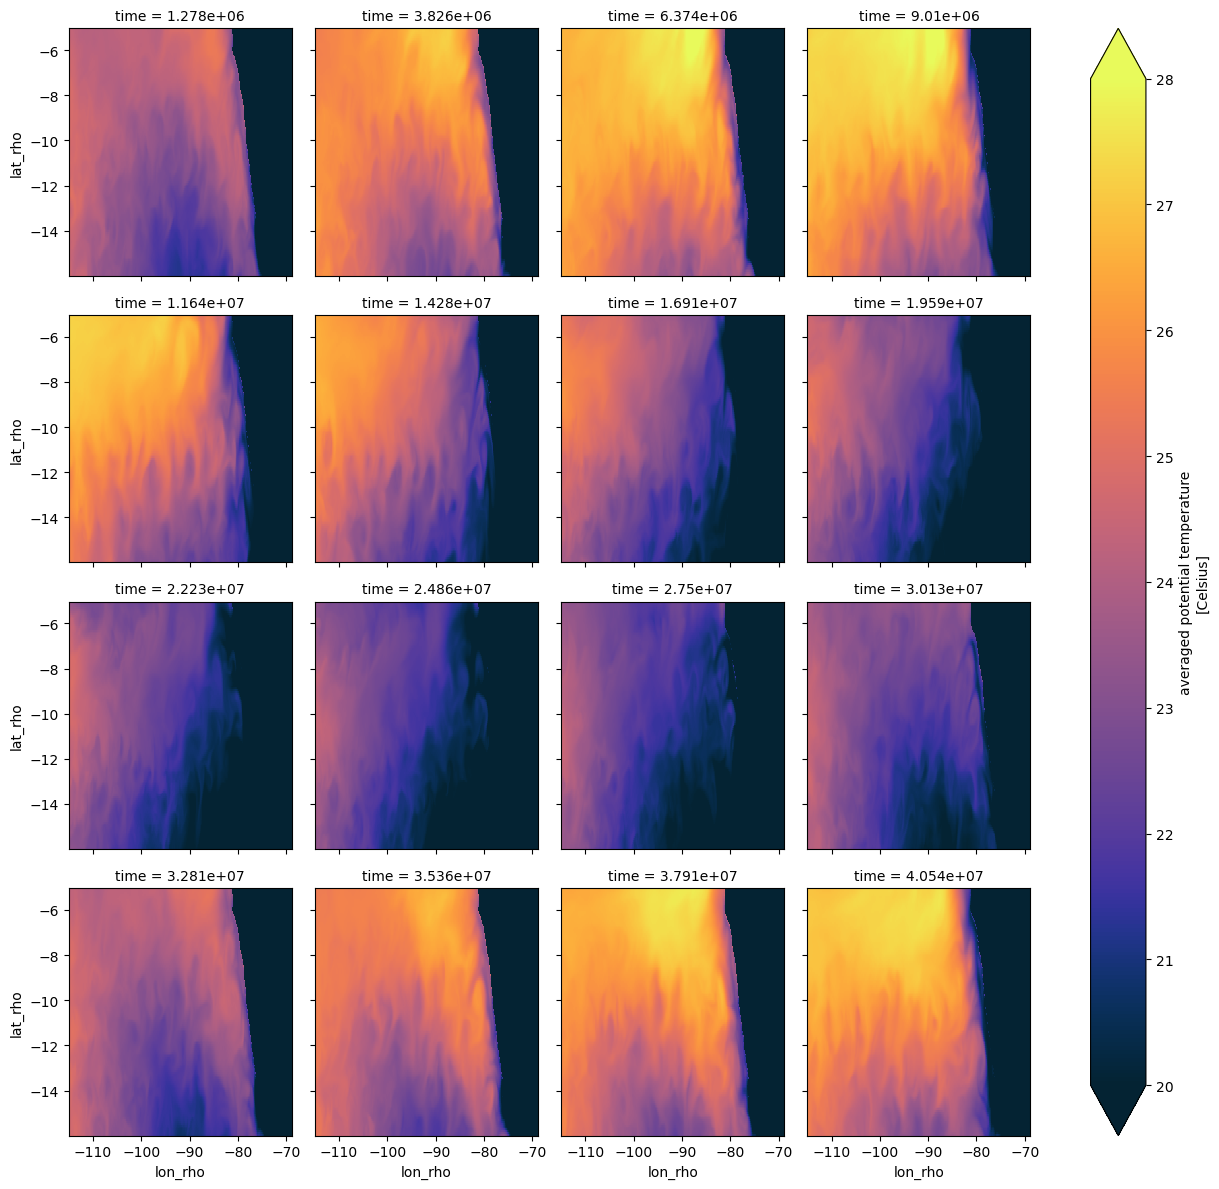

In [8]:
# SPD_grid.isel(time=slice(None,16)).plot(x='grid_lon', 
#                                         y='grid_lat', col='time')
# SPD_grid.isel(time=slice(None, 16)).plot(x="grid_lon", y="grid_lat", col="time", col_wrap=4);
temp.isel(time=slice(None,16)).plot(x="lon_rho", y="lat_rho", cmap=cm.thermal, col='time',col_wrap=4,
                                   vmin =20, vmax=28)


In [9]:
tempi= temp.drop_vars(['eta_rho', 'xi_rho', 's_rho'])  # Replace with coordinates you want to drop
tempi

<xarray.DataArray 'temp' (time: 252, eta_rho: 134, xi_rho: 554)> Size: 75MB
dask.array<where, shape=(252, 134, 554), dtype=float32, chunksize=(1, 134, 554), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) float32 1kB 1.278e+06 3.826e+06 ... 6.586e+08 6.612e+08
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:      averaged potential temperature
    units:          Celsius
    field:          temperature, scalar, series
    standard_name:  sea_water_potential_temperature
    cell_methods:   time: mean

In [10]:
import pandas as pd
time_range = pd.date_range(start="1990-01-01", end="2010-12-01", freq="MS")  # 'MS' = Month Start
tempi = tempi.assign_coords(time=("time", time_range))
tempi

<xarray.DataArray 'temp' (time: 252, eta_rho: 134, xi_rho: 554)> Size: 75MB
dask.array<where, shape=(252, 134, 554), dtype=float32, chunksize=(1, 134, 554), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:      averaged potential temperature
    units:          Celsius
    field:          temperature, scalar, series
    standard_name:  sea_water_potential_temperature
    cell_methods:   time: mean

In [11]:
# Step 1: Calculate monthly climatology (mean for each month across years)
monthly_clim = tempi.groupby("time.month").mean(dim="time")

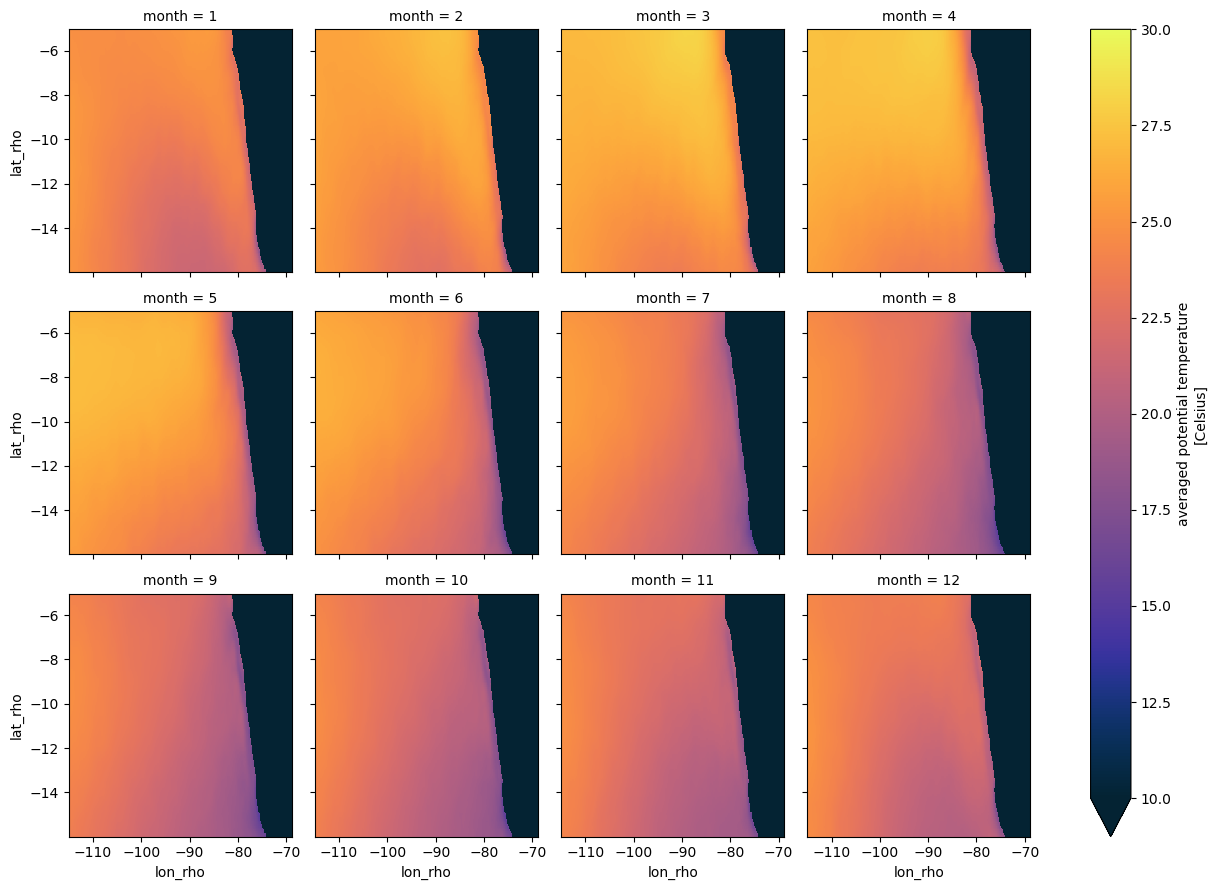

/opt/conda/lib/python3.11/site-packages/dask/core.py:133: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/opt/conda/lib/python3.11/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [12]:
monthly_clim.plot(x="lon_rho", y="lat_rho", cmap=cm.thermal, col='month',col_wrap=4, vmin=10, vmax=30)
#monthly_clim

In [13]:
# Step 2: Calculate monthly anomalies
monthly_anomaly = tempi.groupby("time.month") - monthly_clim
monthly_anomaly

<xarray.DataArray 'temp' (time: 252, eta_rho: 134, xi_rho: 554)> Size: 75MB
dask.array<sub, shape=(252, 134, 554), dtype=float32, chunksize=(1, 134, 554), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: eta_rho, xi_rho

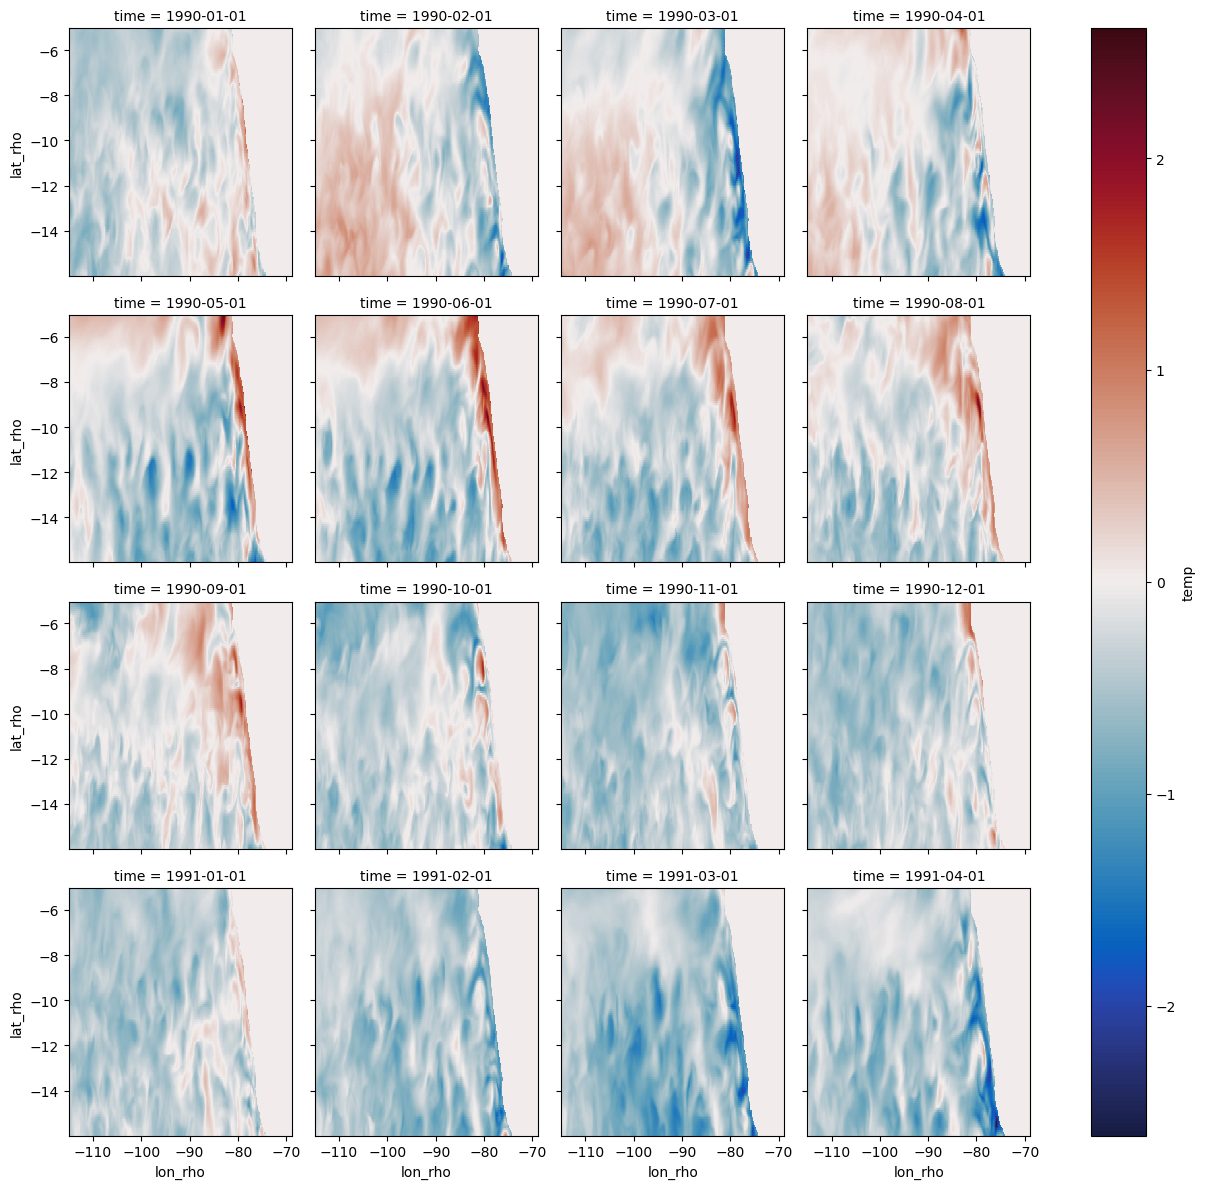

In [14]:
# Step 3: Plot an example anomaly (e.g., first time step)
#temp.isel(time=slice(None,16)).plot(x="lon_rho", y="lat_rho", cmap=cm.thermal, col='time',col_wrap=4)

monthly_anomaly.isel(time=slice(None,16)).plot(x="lon_rho", y="lat_rho", cmap=cm.balance,
                                              col = 'time', col_wrap=4)

In [15]:
#tempi=tempi.assign_vars(anomalies=monthly_anomaly)
#temp_ds = temp.to_dataset(name="temp")

#temp_ds = temp_ds.assign(anomalies=monthly_anomaly)

tempi = tempi.to_dataset(name='sst')

In [16]:
tempi2 = monthly_anomaly.to_dataset(name='ssta')

In [17]:
display(tempi)
display(tempi2)

<xarray.Dataset> Size: 75MB
Dimensions:  (eta_rho: 134, xi_rho: 554, time: 252)
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    sst      (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>

<xarray.Dataset> Size: 75MB
Dimensions:  (eta_rho: 134, xi_rho: 554, time: 252)
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    ssta     (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>

In [18]:
#tempi = tempi.drop_vars("anomalies")
SST = xr.merge([tempi, tempi2])
SST

<xarray.Dataset> Size: 150MB
Dimensions:  (eta_rho: 134, xi_rho: 554, time: 252)
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    sst      (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    ssta     (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>

## Wind Stress

In [19]:
ds_wstr_u = xr.open_mfdataset('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/data/avg_Y*M*.nc',
                            chunks = {'time':1}).sustr
ds_wstr_u

<xarray.DataArray 'sustr' (time: 252, eta_rho: 542, xi_u: 601)> Size: 328MB
dask.array<concatenate, shape=(252, 542, 601), dtype=float32, chunksize=(1, 542, 601), chunktype=numpy.ndarray>
Coordinates:
  * eta_rho  (eta_rho) float32 2kB 1.0 2.0 3.0 4.0 ... 539.0 540.0 541.0 542.0
    lat_u    (eta_rho, xi_u) float32 1MB dask.array<chunksize=(542, 601), meta=np.ndarray>
    lon_u    (eta_rho, xi_u) float32 1MB dask.array<chunksize=(542, 601), meta=np.ndarray>
  * time     (time) float32 1kB 1.278e+06 3.826e+06 ... 6.586e+08 6.612e+08
  * xi_u     (xi_u) float32 2kB 1.5 2.5 3.5 4.5 5.5 ... 598.5 599.5 600.5 601.5
Attributes:
    long_name:      averaged Kinematic u wind stress component
    units:          N/m2
    standard_name:  surface_downward_eastward_stress
    cell_methods:   time: mean

In [20]:
ds_wstr_v = xr.open_mfdataset('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/data/avg_Y*M*.nc',
                            chunks = {'time':1}).svstr

In [21]:
ds_wstr_v

<xarray.DataArray 'svstr' (time: 252, eta_v: 541, xi_rho: 602)> Size: 328MB
dask.array<concatenate, shape=(252, 541, 602), dtype=float32, chunksize=(1, 541, 602), chunktype=numpy.ndarray>
Coordinates:
  * eta_v    (eta_v) float32 2kB 1.5 2.5 3.5 4.5 5.5 ... 538.5 539.5 540.5 541.5
    lat_v    (eta_v, xi_rho) float32 1MB dask.array<chunksize=(541, 602), meta=np.ndarray>
    lon_v    (eta_v, xi_rho) float32 1MB dask.array<chunksize=(541, 602), meta=np.ndarray>
  * time     (time) float32 1kB 1.278e+06 3.826e+06 ... 6.586e+08 6.612e+08
  * xi_rho   (xi_rho) float32 2kB 1.0 2.0 3.0 4.0 ... 599.0 600.0 601.0 602.0
Attributes:
    long_name:      averaged Kinematic v wind stress component
    units:          N/m2
    standard_name:  surface_downward_northward_stress
    cell_methods:   time: mean

In [22]:
wstr_u = ds_wstr_u.where((ds_wstr_u.lat_u.compute() >= -16) & (ds_wstr_u.lat_u.compute() <= -5) & 
                  (ds_wstr_u.lon_u.compute() >= -115) & (ds_wstr_u.lon_u.compute() <= -65), drop=True)

wstr_v = ds_wstr_v.where((ds_wstr_v.lat_v.compute() >= -16) & (ds_wstr_v.lat_v.compute() <= -5) & 
                  (ds_wstr_v.lon_v.compute() >= -115) & (ds_wstr_v.lon_v.compute() <= -65), drop=True)

In [23]:
time_range = pd.date_range(start="1990-01-01", end="2010-12-01", freq="MS")  # 'MS' = Month Start
wstr_u = wstr_u.assign_coords(time=("time", time_range))
wstr_u = wstr_u.drop_vars(['eta_rho', 'xi_u','lat_u','lon_u'])
#wstr_u = wstr_u.drop_vars(['lat_u','lon_u'])
wstr_u

<xarray.DataArray 'sustr' (time: 252, eta_rho: 134, xi_u: 554)> Size: 75MB
dask.array<where, shape=(252, 134, 554), dtype=float32, chunksize=(1, 134, 554), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
Dimensions without coordinates: eta_rho, xi_u
Attributes:
    long_name:      averaged Kinematic u wind stress component
    units:          N/m2
    standard_name:  surface_downward_eastward_stress
    cell_methods:   time: mean

In [24]:
wstr_v = wstr_v.assign_coords(time=("time", time_range))
wstr_v = wstr_v.drop_vars(['eta_v', 'xi_rho','lat_v','lon_v'])
wstr_v

<xarray.DataArray 'svstr' (time: 252, eta_v: 135, xi_rho: 554)> Size: 75MB
dask.array<where, shape=(252, 135, 554), dtype=float32, chunksize=(1, 135, 554), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
Dimensions without coordinates: eta_v, xi_rho
Attributes:
    long_name:      averaged Kinematic v wind stress component
    units:          N/m2
    standard_name:  surface_downward_northward_stress
    cell_methods:   time: mean

In [25]:
SST = xr.merge([SST, wstr_u,wstr_v])
SST

<xarray.Dataset> Size: 300MB
Dimensions:  (eta_rho: 134, xi_rho: 554, time: 252, xi_u: 554, eta_v: 135)
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v
Data variables:
    sst      (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    ssta     (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    sustr    (time, eta_rho, xi_u) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    svstr    (time, eta_v, xi_rho) float32 75MB dask.array<chunksize=(1, 135, 554), meta=np.ndarray>

In [26]:
SST = SST.swap_dims({'xi_u': 'xi_rho'})

In [27]:
SST

<xarray.Dataset> Size: 300MB
Dimensions:  (eta_rho: 134, xi_rho: 554, time: 252, eta_v: 135)
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: eta_rho, xi_rho, eta_v
Data variables:
    sst      (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    ssta     (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    sustr    (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    svstr    (time, eta_v, xi_rho) float32 75MB dask.array<chunksize=(1, 135, 554), meta=np.ndarray>

In [28]:
sst_u_corr = xr.corr(SST['sst'], SST['sustr']*-1, dim="time") ## positive U wind 

In [29]:
SST["svstr"] = xr.DataArray(
    data=SST["svstr"].isel(eta_v=slice(0, 134)).data,
    dims=["time", "eta_rho", "xi_rho"],
    coords={
        "time": SST["time"],
        "eta_rho": SST["eta_rho"][:134],
        "xi_rho": SST["xi_rho"],
    },
    name="svstr"
)
#SST["svstr"] = SST["svstr"].rename({"eta_v": "eta_rho"})
#sst_v_corr = xr.corr(SST['sst'], SST.svstr[:,:134,:], dim="time") ## positive v wind 

In [30]:
sst_v_corr = xr.corr(SST['sst'], SST.svstr, dim="time")
sst_v_corr

<xarray.DataArray (eta_rho: 134, xi_rho: 554)> Size: 297kB
dask.array<truediv, shape=(134, 554), dtype=float32, chunksize=(134, 554), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * eta_rho  (eta_rho) int64 1kB 0 1 2 3 4 5 6 7 ... 127 128 129 130 131 132 133
  * xi_rho   (xi_rho) int64 4kB 0 1 2 3 4 5 6 7 ... 547 548 549 550 551 552 553

Text(0.5, 1.0, 'SST vs Windstress U')

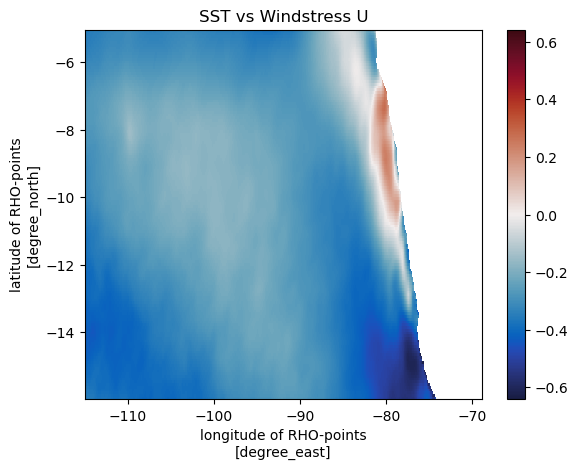

In [31]:
#sst_u_corr.plot(x="lon_rho", y="lat_rho", cmap=cm.balance, vmin=-1, vmax=1)
#sst_u_corr[0,:,:].values()

## reassing the coords of the wind_u so I can have the same coord_names and then perform the correlation
sst_u_corr.plot(x="lon_rho", y="lat_rho", cmap=cm.balance)
#plt.grid()     
plt.title('SST vs Windstress U')
# plt.savefig('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/SST_WU2.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')

Text(0.5, 1.0, 'SST vs Windstress v')

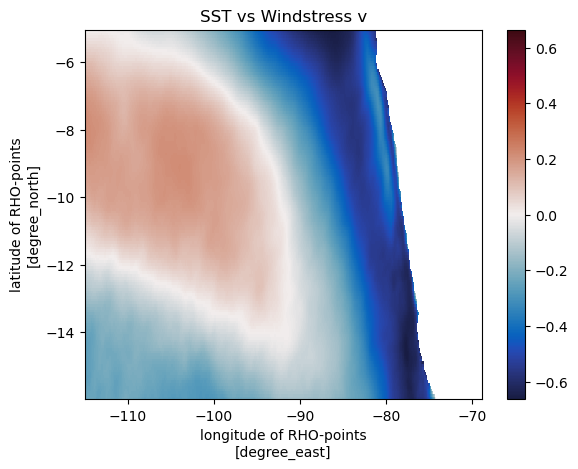

In [32]:
sst_v_corr.plot(x="lon_rho", y="lat_rho", cmap=cm.balance)
#plt.grid()     
plt.title('SST vs Windstress v')
# plt.savefig('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/SST_WV.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')

## Windstress Curl

In [33]:
## read the windstress curl from matlab

from scipy.io import loadmat

# Load MATLAB file
mat_data = loadmat("../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/indices/EKMAN_pump_April.mat")

# Check keys in the MATLAB file
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Crosshore_wind', 'Curl', 'Divergence', 'EK_pump', 'LTM_ekpump', 'UEK', 'VEK', 'VTauy'])


In [34]:
# Extract a variable (e.g., 'data_var')
Curl = mat_data['Curl']  # Replace 'data_var' with the actual variable name
Ek_pump = mat_data['EK_pump']
#plt.pcolormesh(ds_temp['lon_rho'],ds_temp['lat_rho'],Curl[:,:,0].T)

In [35]:
import numpy as np
print(Curl.shape)
#-118.9083, -68.90833 lon
# -33, 10.03286 lat
# lon_rho = np.linspace(-118.9083,-68.90833,602)
# lat_rho = np.linspace(-33,10.03286,602,542)

# Assuming lat_rho and lon_rho were defined as 1D linspace arrays
lat_rho = np.linspace(-33.0, 10.03286, 542).reshape(542, 1)  # Reshape to match eta_rho
lon_rho = np.linspace(-118.9083, -68.90833, 602).reshape(1, 602)  # Reshape to match xi_rho

# Create a 2D meshgrid for lat_rho and lon_rho
lat_rho, lon_rho = np.meshgrid(lat_rho.flatten(), lon_rho.flatten(), indexing="ij")


(602, 542, 252)


In [36]:
#Dimensions: eta_rho: 134 xi_rho: 254 time: 252 eta_v: 135
# (time, eta_rho, xi_rho)
#lat: 134, lon: 254
EK_ds = xr.Dataset(
    data_vars={
        'Curl': (("xi_rho", "eta_rho","time"), Curl),
        'Ekman_pump': (("xi_rho", "eta_rho","time"), Ek_pump),
    },
    coords = {
        'lat_rho':ds_temp.lat_rho,
        'lon_rho':ds_temp.lon_rho,
        'time':ds_temp.time
}
)

EK_ds


<xarray.Dataset> Size: 1GB
Dimensions:     (xi_rho: 602, eta_rho: 542, time: 252)
Coordinates:
  * eta_rho     (eta_rho) float32 2kB 1.0 2.0 3.0 4.0 ... 540.0 541.0 542.0
    lat_rho     (eta_rho, xi_rho) float32 1MB dask.array<chunksize=(542, 602), meta=np.ndarray>
    lon_rho     (eta_rho, xi_rho) float32 1MB dask.array<chunksize=(542, 602), meta=np.ndarray>
    s_rho       float32 4B -0.01562
  * xi_rho      (xi_rho) float32 2kB 1.0 2.0 3.0 4.0 ... 599.0 600.0 601.0 602.0
  * time        (time) float32 1kB 1.278e+06 3.826e+06 ... 6.586e+08 6.612e+08
Data variables:
    Curl        (xi_rho, eta_rho, time) float64 658MB 7.839e-08 ... nan
    Ekman_pump  (xi_rho, eta_rho, time) float64 658MB -9.628e-07 ... nan

In [37]:
EK_ds = EK_ds.assign_coords(
    lat_rho=(("eta_rho", "xi_rho"), ds_temp['lat_rho'].values),
    lon_rho=(("eta_rho", "xi_rho"), ds_temp['lon_rho'].values)
)

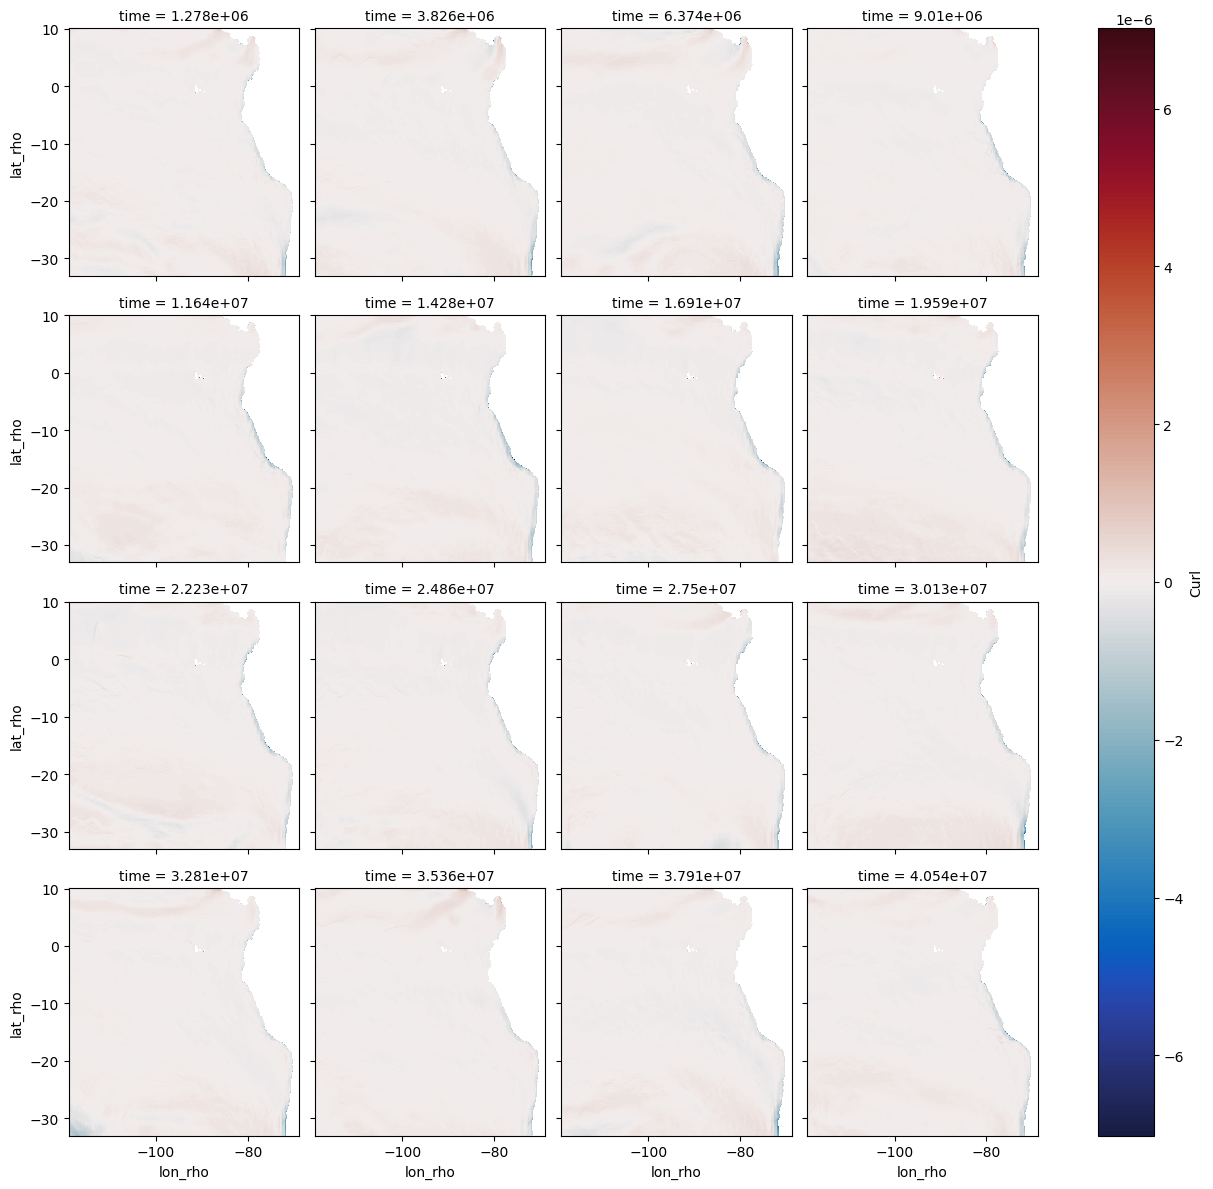

In [38]:
# EK_ds.Curl.isel(time=slice(None,16)).plot(x="lon_rho", y="lat_rho", 
#                                           cmap=cm.balance,col='time',col_wrap=4)
# temp.isel(time=slice(None,16)).plot(x="lon_rho", y="lat_rho", cmap=cm.thermal, col='time',col_wrap=4)


In [39]:
def slice_lat_lon(data, lat_var, lon_var, lat_range, lon_range):
    """
    Slice a dataset or data array based on latitude and longitude ranges.

    Parameters:
    - data (xarray.Dataset or xarray.DataArray): The data to slice.
    - lat_var (str): The name of the latitude variable in the dataset.
    - lon_var (str): The name of the longitude variable in the dataset.
    - lat_range (tuple): The latitude range to slice (min_lat, max_lat).
    - lon_range (tuple): The longitude range to slice (min_lon, max_lon).

    Returns:
    - xarray.Dataset or xarray.DataArray: The sliced data.
    """
    return data.where(
        (data[lat_var].compute() >= lat_range[0]) & 
        (data[lat_var].compute() <= lat_range[1]) & 
        (data[lon_var].compute() >= lon_range[0]) & 
        (data[lon_var].compute() <= lon_range[1]),
        drop=True
    )

In [40]:
lat_range = (-16, -5)
lon_range = (-115, -65)

Ekman_ds = slice_lat_lon(EK_ds, 'lat_rho', 'lon_rho', lat_range, lon_range)
Ekman_ds

<xarray.Dataset> Size: 300MB
Dimensions:     (xi_rho: 554, eta_rho: 134, time: 252)
Coordinates:
  * eta_rho     (eta_rho) float32 536B 227.0 228.0 229.0 ... 358.0 359.0 360.0
    lat_rho     (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho     (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
    s_rho       float32 4B -0.01562
  * xi_rho      (xi_rho) float32 2kB 49.0 50.0 51.0 52.0 ... 600.0 601.0 602.0
  * time        (time) float32 1kB 1.278e+06 3.826e+06 ... 6.586e+08 6.612e+08
Data variables:
    Curl        (xi_rho, eta_rho, time) float64 150MB 1.304e-07 ... nan
    Ekman_pump  (xi_rho, eta_rho, time) float64 150MB -3.173e-06 ... nan

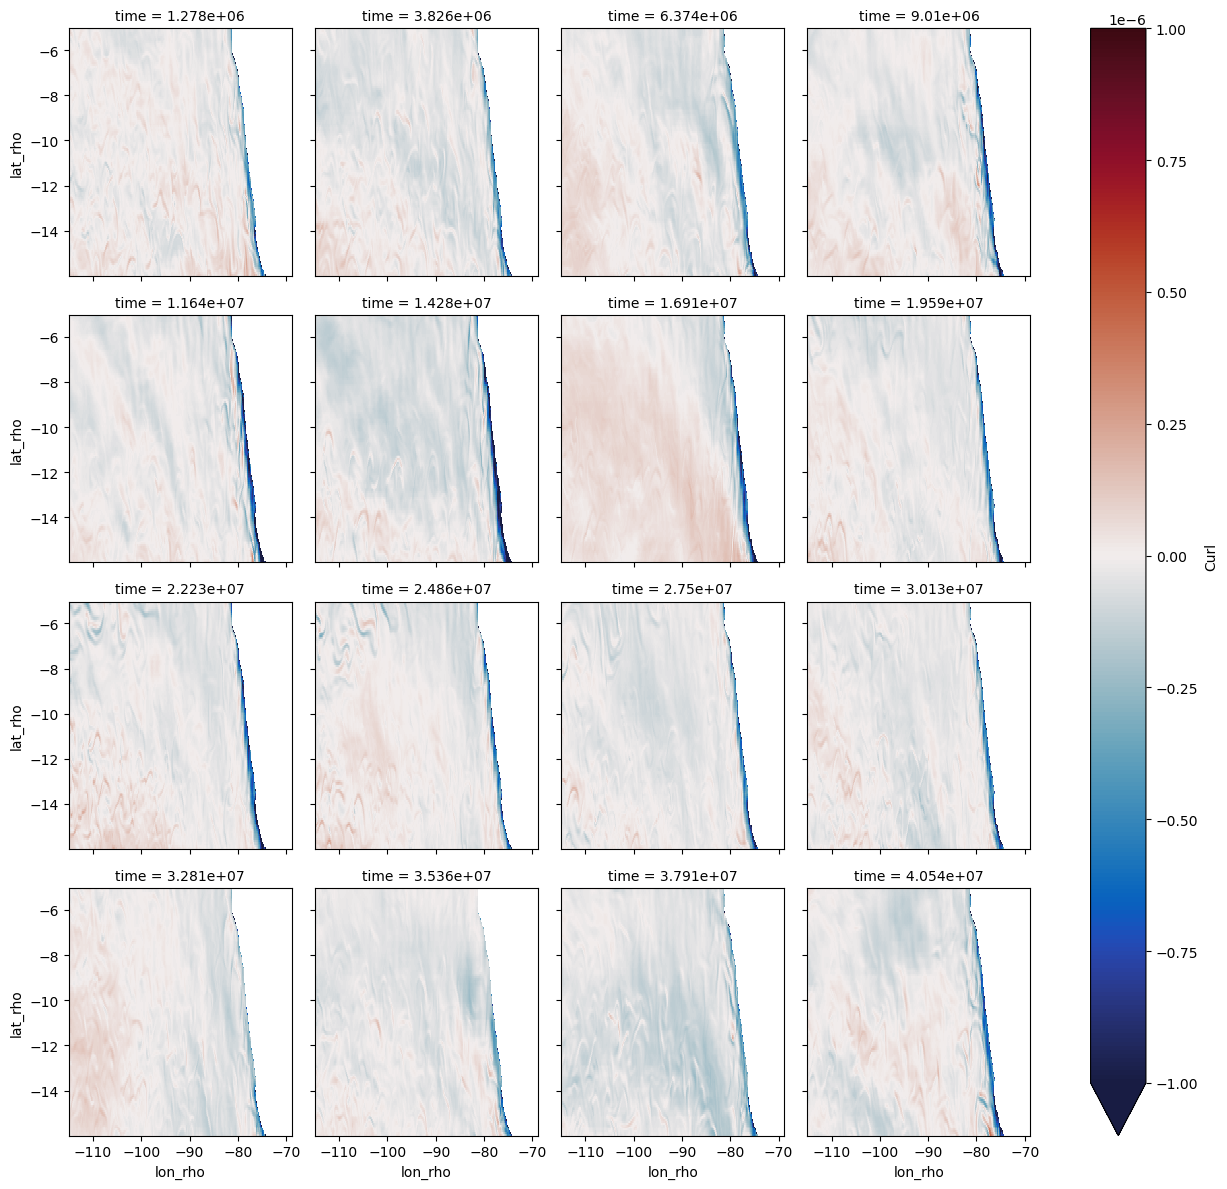

In [41]:
Ekman_ds.Curl.isel(time=slice(None,16)).plot(x="lon_rho", y="lat_rho", 
                                          cmap=cm.balance,col='time',col_wrap=4,
                                            vmin=-1e-6, vmax=1e-6)


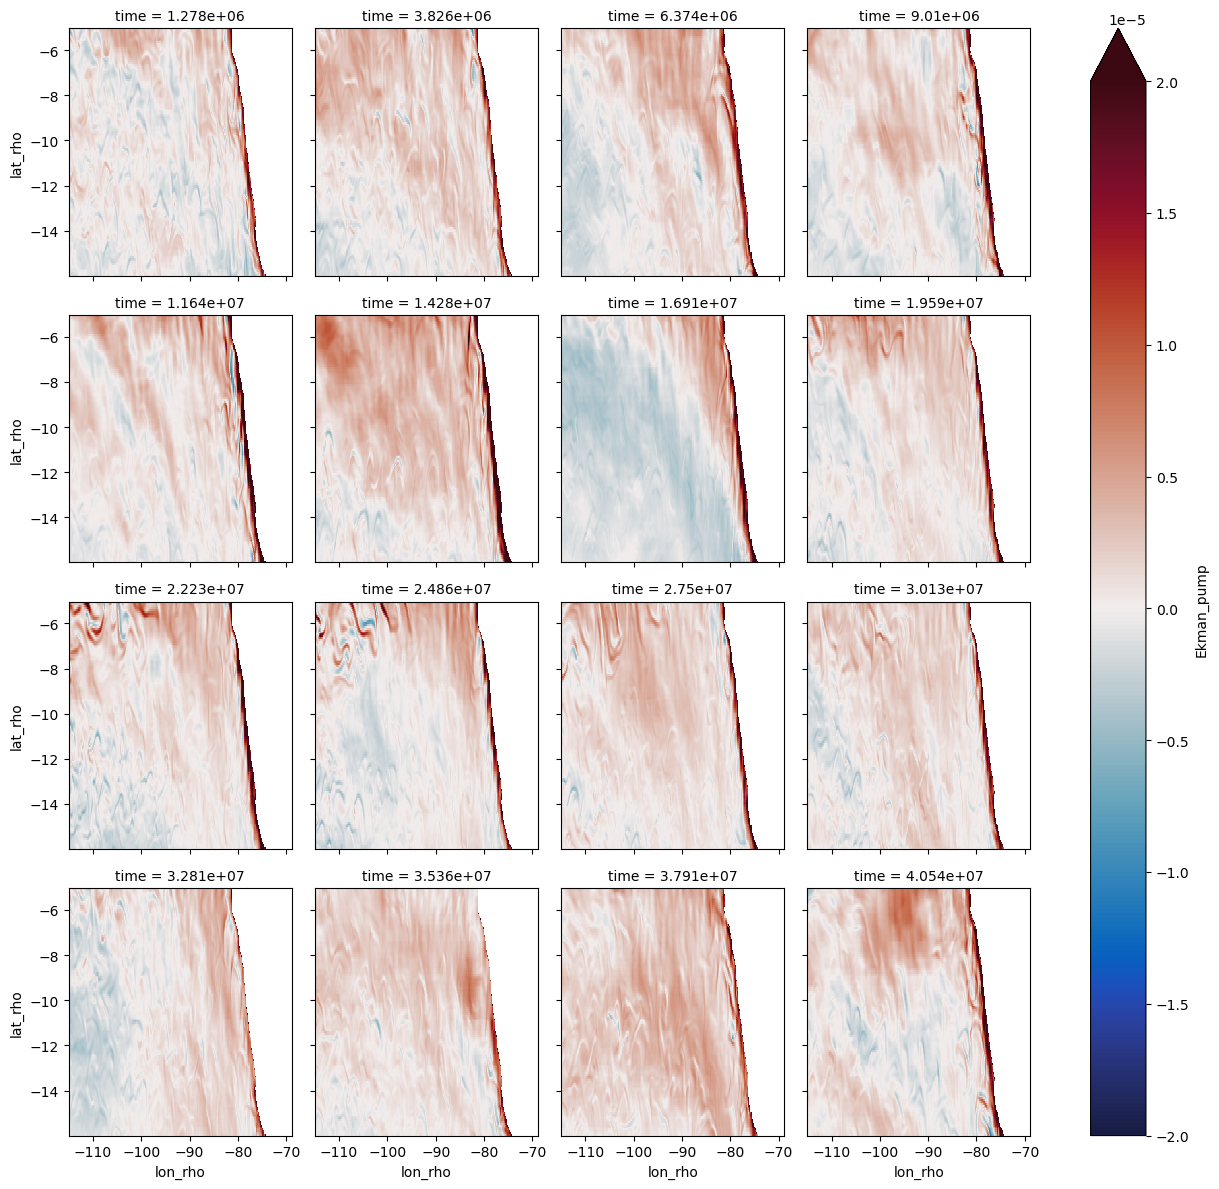

In [42]:
Ekman_ds.Ekman_pump.isel(time=slice(None,16)).plot(x="lon_rho", y="lat_rho", 
                                          cmap=cm.balance,col='time',col_wrap=4,
                                            vmin=-2e-5, vmax=2e-5)


In [43]:
display(SST)
display(Ekman_ds)

<xarray.Dataset> Size: 300MB
Dimensions:  (eta_rho: 134, xi_rho: 554, time: 252)
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
  * eta_rho  (eta_rho) int64 1kB 0 1 2 3 4 5 6 7 ... 127 128 129 130 131 132 133
  * xi_rho   (xi_rho) int64 4kB 0 1 2 3 4 5 6 7 ... 547 548 549 550 551 552 553
Data variables:
    sst      (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    ssta     (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    sustr    (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>
    svstr    (time, eta_rho, xi_rho) float32 75MB dask.array<chunksize=(1, 134, 554), meta=np.ndarray>

<xarray.Dataset> Size: 300MB
Dimensions:     (xi_rho: 554, eta_rho: 134, time: 252)
Coordinates:
  * eta_rho     (eta_rho) float32 536B 227.0 228.0 229.0 ... 358.0 359.0 360.0
    lat_rho     (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho     (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
    s_rho       float32 4B -0.01562
  * xi_rho      (xi_rho) float32 2kB 49.0 50.0 51.0 52.0 ... 600.0 601.0 602.0
  * time        (time) float32 1kB 1.278e+06 3.826e+06 ... 6.586e+08 6.612e+08
Data variables:
    Curl        (xi_rho, eta_rho, time) float64 150MB 1.304e-07 ... nan
    Ekman_pump  (xi_rho, eta_rho, time) float64 150MB -3.173e-06 ... nan

In [44]:
#list(SST.dims)
Ekman_ds = Ekman_ds.transpose('eta_rho', 'xi_rho', 'time')
Ekman_ds=Ekman_ds.drop_vars(['eta_rho', 's_rho','xi_rho'])
#Ekman_ds = Ekman_ds.drop_vars(['eta_rho', 's_rho', 'xi_rho'])

Ekman_ds

<xarray.Dataset> Size: 300MB
Dimensions:     (eta_rho: 134, xi_rho: 554, time: 252)
Coordinates:
    lat_rho     (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho     (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time        (time) float32 1kB 1.278e+06 3.826e+06 ... 6.586e+08 6.612e+08
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    Curl        (eta_rho, xi_rho, time) float64 150MB 1.304e-07 ... nan
    Ekman_pump  (eta_rho, xi_rho, time) float64 150MB -3.173e-06 ... nan

In [45]:
#SST = xr.merge([SST, Ekman_ds])
Ekman_ds = Ekman_ds.assign_coords(time=("time", time_range))

sst_ekpump_corr = xr.corr(SST['sst'], Ekman_ds['Ekman_pump'], dim="time")

Text(0.5, 1.0, 'SST vs Ek_pump')

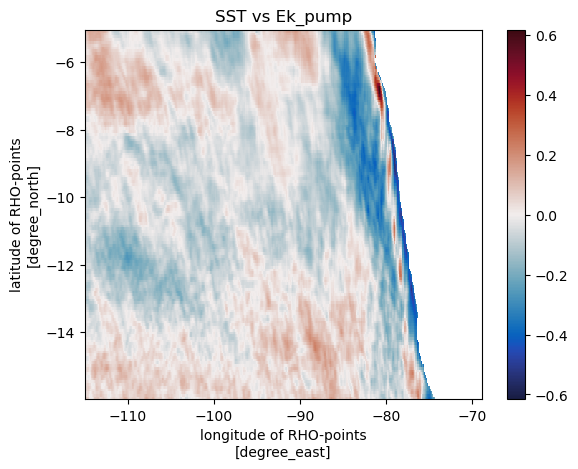

In [46]:
sst_ekpump_corr.plot(x="lon_rho", y="lat_rho", cmap=cm.balance)
#plt.grid()     
plt.title('SST vs Ek_pump')
# plt.savefig('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/SST_Pump.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')

In [47]:
#ssta_ekpump_corr = xr.corr(SST['ssta'], Ekman_ds['Ekman_pump'], dim="time")
# remove the seasonality of the pump

Ekman_clim = Ekman_ds['Ekman_pump'].groupby("time.month").mean(dim="time")
# Ekman_clim.plot(x="lon_rho", y="lat_rho", cmap=cm.balance, col='month',col_wrap=4,
#                vmin=-3e-5, vmax=3e-5)


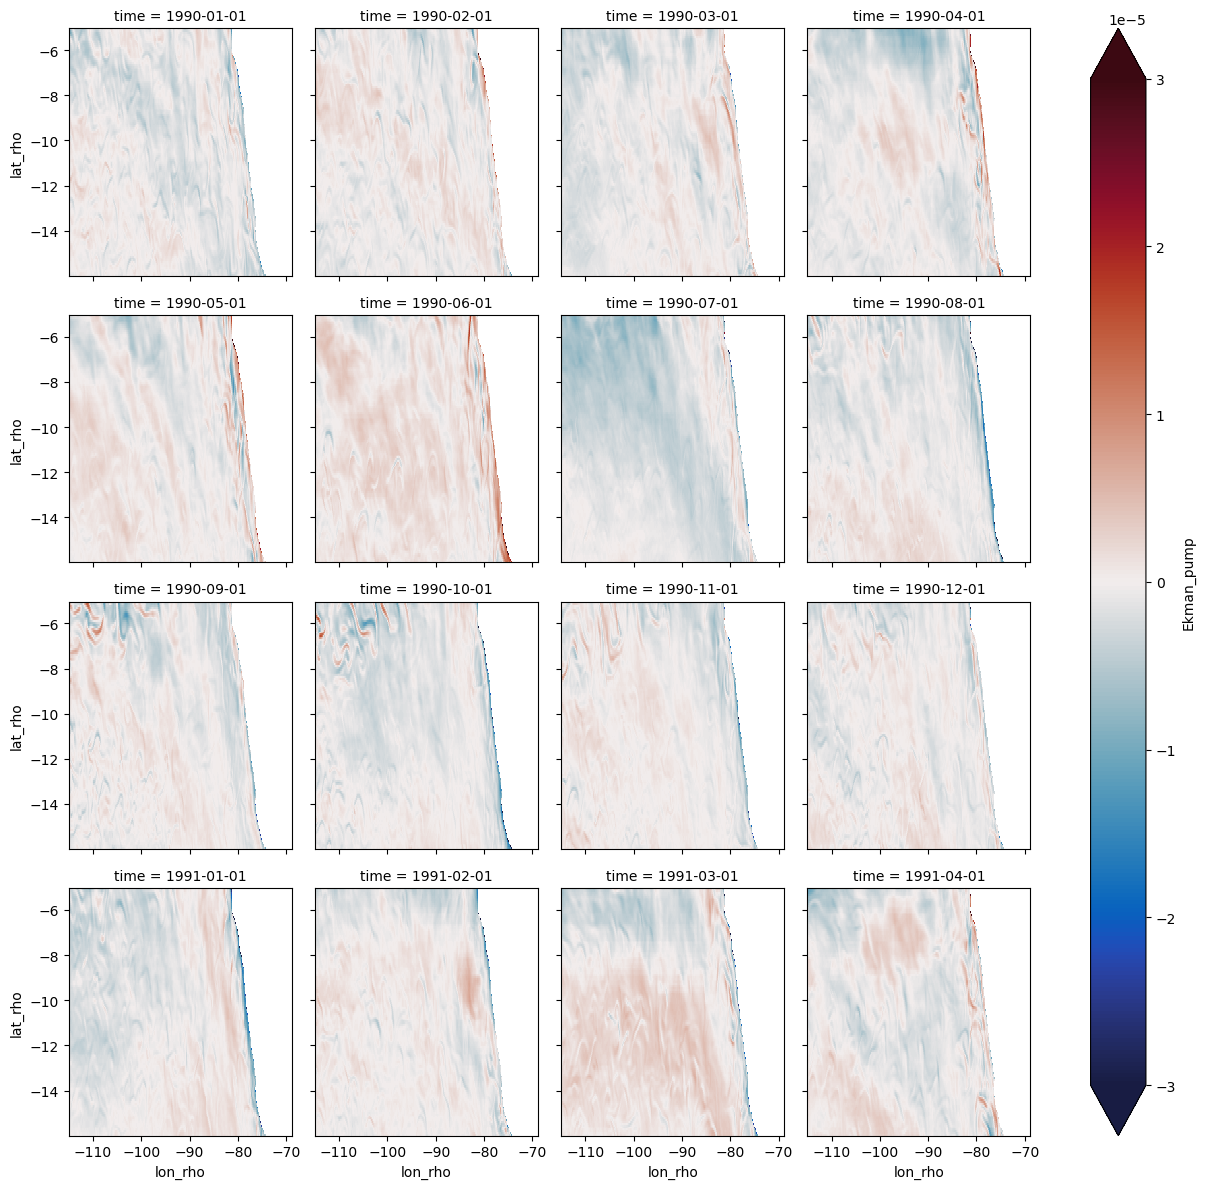

In [48]:
ek_anomaly = Ekman_ds['Ekman_pump'].groupby("time.month") - Ekman_clim
ek_anomaly.isel(time=slice(None,16)).plot(x="lon_rho", y="lat_rho", cmap=cm.balance,
                                              col = 'time', col_wrap=4,
                                         vmin=-3e-5, vmax=3e-5)


In [49]:
# SST = xr.merge([tempi, tempi2])

ek_anomaly = ek_anomaly.rename("ek_anomaly")
Ekman_ds=xr.merge([Ekman_ds,ek_anomaly])
Ekman_ds

<xarray.Dataset> Size: 450MB
Dimensions:     (eta_rho: 134, xi_rho: 554, time: 252)
Coordinates:
    lat_rho     (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho     (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time        (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    month       (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    Curl        (eta_rho, xi_rho, time) float64 150MB 1.304e-07 ... nan
    Ekman_pump  (eta_rho, xi_rho, time) float64 150MB -3.173e-06 ... nan
    ek_anomaly  (eta_rho, xi_rho, time) float64 150MB -2.098e-06 ... nan

Text(0.5, 1.0, 'SSTa vs Ek_pump_a')

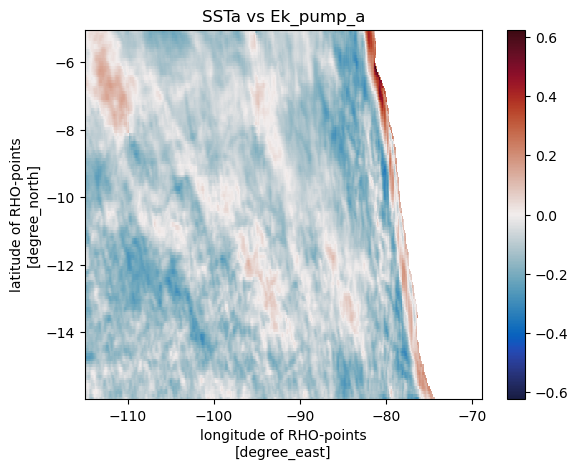

In [50]:
ssta_ekpump_corr = xr.corr(SST['ssta'], Ekman_ds['ek_anomaly'], dim="time") ## similar to Yari

ssta_ekpump_corr.plot(x="lon_rho", y="lat_rho", cmap=cm.balance)
#plt.grid()     
plt.title('SSTa vs Ek_pump_a')
# plt.savefig('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/SSTa_Pump_a.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')

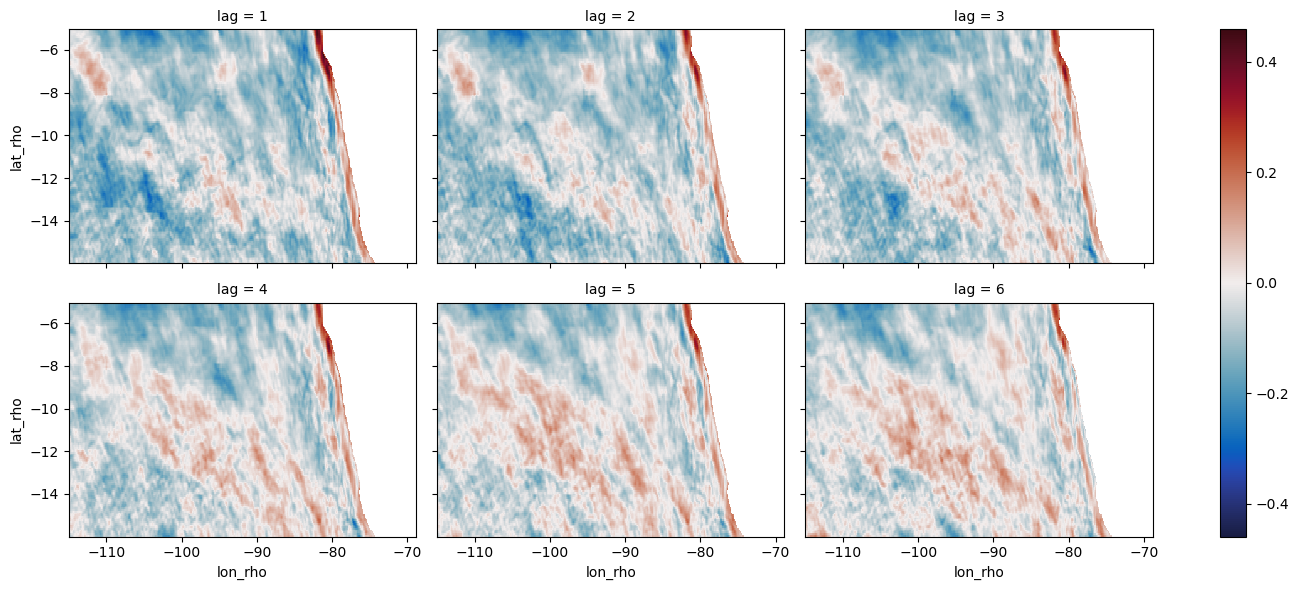

In [51]:
# import xarray as xr
# import matplotlib.pyplot as plt

# Create an empty DataArray to store correlations for each lag
lags = range(1, 7)  # 1 to 6 months
corr_lags = []

for lag in lags:
    # # Shift the SST anomalies by 1 month (forward in time)
    ssta_lagged = SST['ssta'].shift(time=-lag)
    
    # Compute the correlation for the current lag
    corr = xr.corr(ssta_lagged, Ekman_ds['ek_anomaly'], dim="time")
    
    # Add a new dimension for the lag
    corr = corr.expand_dims(lag=[lag])
    corr_lags.append(corr)

# Concatenate all correlations along the new "lag" dimension
ssta_ekpump_corr_lags = xr.concat(corr_lags, dim="lag")

# Plot the correlations for each lag
ssta_ekpump_corr_lags.plot(
    x="lon_rho",
    y="lat_rho",
    col="lag",
    col_wrap=3,  # Adjust the layout of the plots
    cmap=cm.balance,  # Color map
    aspect=1.5,  # Adjust aspect ratio
    subplot_kws={"title": "Lag: {value} month(s)"}
)

plt.show()

Text(0.5, 1.0, 'Lag = 1')

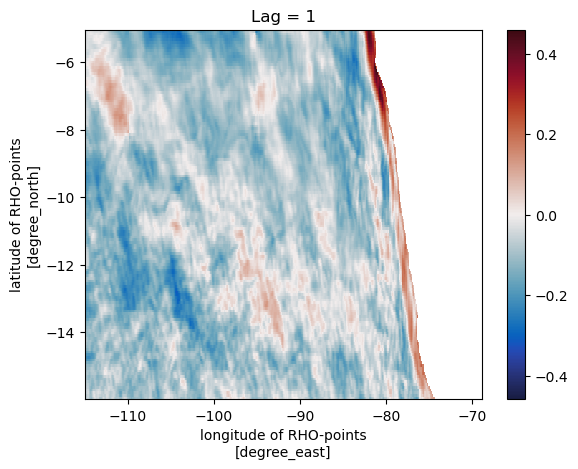

In [52]:
# Shift the SST anomalies by 1 month (forward in time)
ssta_lagged = SST['ssta'].shift(time=-1)

# Compute the correlation
ssta_ekpump_corr = xr.corr(ssta_lagged, Ekman_ds['ek_anomaly'], dim="time")

# Display the correlation
ssta_ekpump_corr.plot(x="lon_rho", y="lat_rho", cmap=cm.balance)
#plt.grid()     
plt.title('Lag = 1')


## Calibration of CUI 
#### Find the maximum abosulte difference between inshore and offshore
#### 1) Cut the 150km inshore 
#### 2) Average every 2 degrees
#### 3) Find the distance in km of the mayor gradient between the 2 degrees average and the offshore

In [53]:
#!pip install haversine

In [54]:
# Identify coastal indices (e.g., the first non-NaN grid points along each longitude)
coastal_indices = ~np.isnan(SST['svstr'].isel(time=0).values)
coastal_latitudes = SST['lat_rho'].values[coastal_indices]
coastal_longitudes = SST['lon_rho'].values[coastal_indices]


In [55]:
## kml to struct
import re
from xml.etree import ElementTree as ET
import numpy as np

def kml2struct(kml_file):
    """
    Import a .kml file as a list of dictionary structures with fields:
    Geometry, Name, Description, Lon, Lat, and BoundingBox.
    """
    # Read the KML file
    try:
        with open(kml_file, 'r', encoding='utf-8') as file:
            txt = file.read()
    except Exception as e:
        raise FileNotFoundError(f"Unable to open file {kml_file}: {e}")

    # Regular expression to match Placemark tags
    expr = r"<Placemark.+?>.+?</Placemark>"
    object_strings = re.findall(expr, txt, re.DOTALL)
    
    kml_struct = []

    for obj_str in object_strings:
        # Extract Name
        name_match = re.search(r"<name.*?>(.*?)</name>", obj_str, re.DOTALL)
        name = name_match.group(1).strip() if name_match else "undefined"

        # Extract Description
        desc_match = re.search(r"<description.*?>(.*?)</description>", obj_str, re.DOTALL)
        desc = desc_match.group(1).strip() if desc_match else ""

        # Determine Geometry Type
        geometry = ""
        if "<Point" in obj_str:
            geometry = "Point"
        elif "<LineString" in obj_str:
            geometry = "Line"
        elif "<Polygon" in obj_str:
            geometry = "Polygon"

        # Extract Coordinates
        coord_match = re.search(r"<coordinates.*?>(.*?)</coordinates>", obj_str, re.DOTALL)
        if not coord_match:
            continue  # Skip if no coordinates are found
        coord_str = coord_match.group(1).strip()
        coord_list = np.array([list(map(float, coord.split(','))) for coord in coord_str.split()])

        # Separate Lon, Lat, and handle Polygons
        lon = coord_list[:, 0]
        lat = coord_list[:, 1]
        if geometry == "Polygon":
            # Close the polygon by appending NaN
            lon = np.append(lon, np.nan)
            lat = np.append(lat, np.nan)

        # Create BoundingBox
        bounding_box = [[lon.min(), lat.min()], [lon.max(), lat.max()]]

        # Append to kml_struct
        kml_struct.append({
            "Geometry": geometry,
            "Name": name,
            "Description": desc,
            "Lon": lon,
            "Lat": lat,
            "BoundingBox": bounding_box
        })

    return kml_struct


In [56]:
# Load the KML file to get the polygon boundary
arch_kml_zona1 = "../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/indices/BK150km.kml"
R1 = kml2struct(arch_kml_zona1)

# Extract Lon and Lat from the first polygon
lonb1 = R1[0]["Lon"]
latb1 = R1[0]["Lat"]


In [57]:
from matplotlib.path import Path
LON=Ekman_ds.lon_rho.values
LAT=Ekman_ds.lat_rho.values
# Create a path from the polygon coordinates
polygon = Path(np.column_stack((lonb1, latb1)))

# Flatten the LON and LAT to create coordinate pairs
lonlat_points = np.column_stack((LON.ravel(), LAT.ravel()))

# Check which points are inside the polygon
mask = polygon.contains_points(lonlat_points).reshape(LON.shape)

# Convert the mask to NaN for the outshore region
inshore_mask = np.where(mask, 1, np.nan)

# Apply the mask to SST
#SST_inshore = ssta_ekpump_corr * inshore_mask

In [58]:
SST_inshore = SST['sst'] * inshore_mask
#SST_inshore = SST_inshore.rename({"xi_rho": "lon", "eta_rho": "lat"})
# Extract raw numpy arrays for lat_rho and lon_rho
# lat_data = SST["lat_rho"].values
# lon_data = SST["lon_rho"].values

# # Assign these coordinates directly to the DataArray
# SST_inshore = SST_inshore.assign_coords(
#     lat=(("eta_rho", "xi_rho"), lat_data),
#     lon=(("eta_rho", "xi_rho"), lon_data),
# )

SST_inshore = SST_inshore.assign_coords(
    {
        "lat": (("eta_rho", "xi_rho"), SST_inshore["lat_rho"].values),
        "lon": (("eta_rho", "xi_rho"), SST_inshore["lon_rho"].values),
    }
)
# Rename dimensions eta_rho and xi_rho to lat and lon
#SST_inshore = SST_inshore.rename({"eta_rho": "lat", "xi_rho": "lon"})

SST_inshore

<xarray.DataArray 'sst' (time: 252, eta_rho: 134, xi_rho: 554)> Size: 150MB
dask.array<mul, shape=(252, 134, 554), dtype=float64, chunksize=(1, 134, 554), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
  * eta_rho  (eta_rho) int64 1kB 0 1 2 3 4 5 6 7 ... 127 128 129 130 131 132 133
  * xi_rho   (xi_rho) int64 4kB 0 1 2 3 4 5 6 7 ... 547 548 549 550 551 552 553
    lat      (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon      (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87

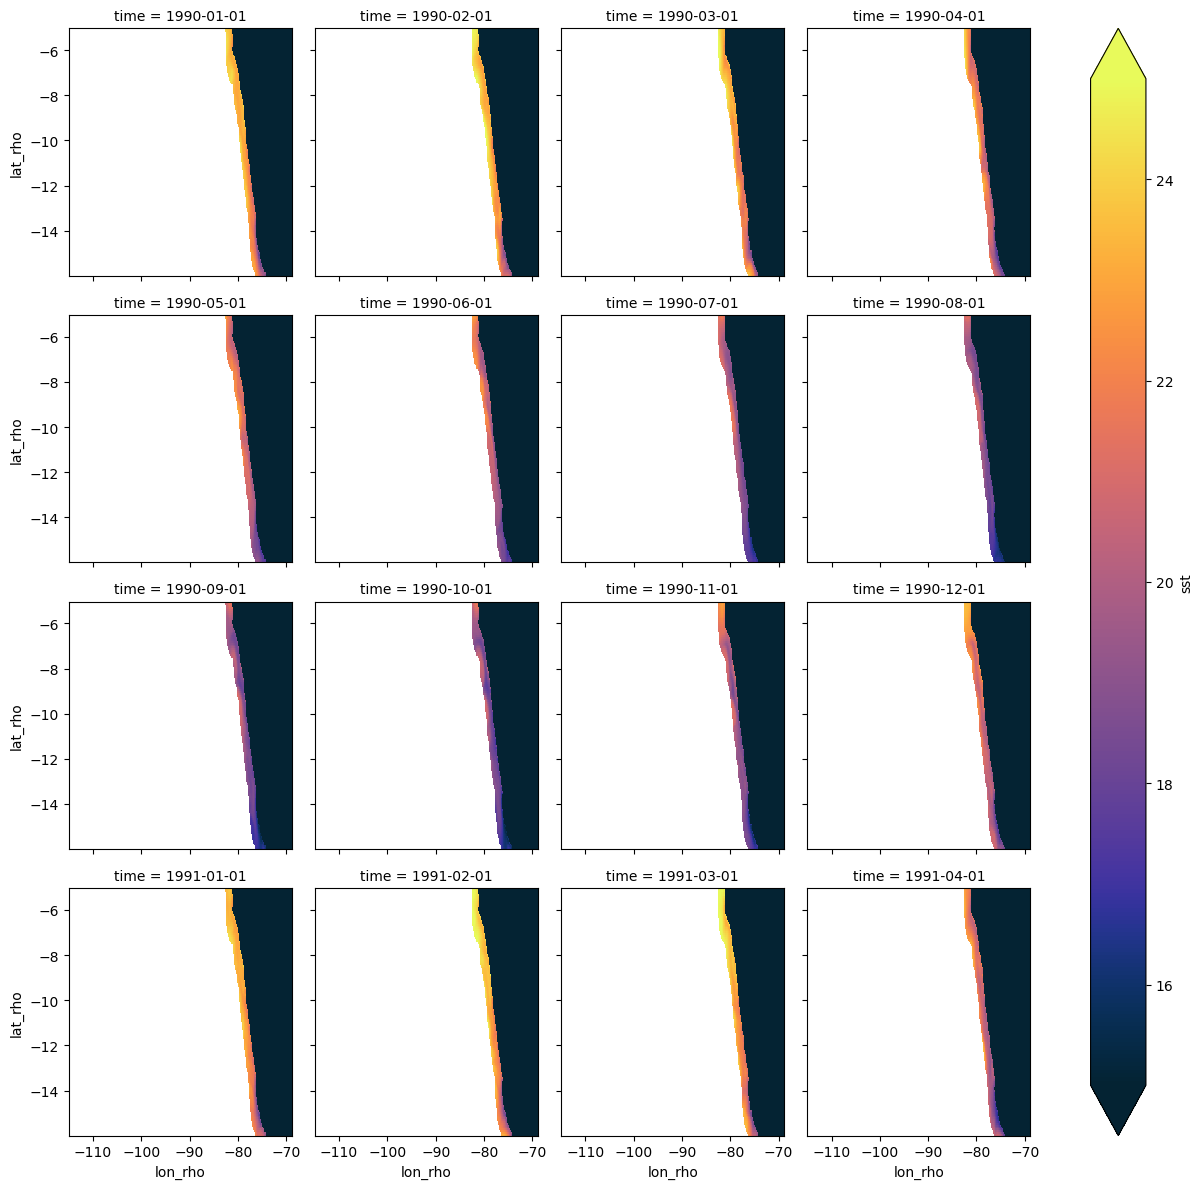

In [59]:
SST_inshore.isel(time=slice(None,16)).plot(x="lon_rho", y="lat_rho", cmap=cm.thermal,
                                              col = 'time', col_wrap=4,
                                         vmin=15, vmax=25)

#plt.grid()     

In [60]:
SST_inshore

<xarray.DataArray 'sst' (time: 252, eta_rho: 134, xi_rho: 554)> Size: 150MB
dask.array<mul, shape=(252, 134, 554), dtype=float64, chunksize=(1, 134, 554), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon_rho  (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    month    (time) int64 2kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
  * eta_rho  (eta_rho) int64 1kB 0 1 2 3 4 5 6 7 ... 127 128 129 130 131 132 133
  * xi_rho   (xi_rho) int64 4kB 0 1 2 3 4 5 6 7 ... 547 548 549 550 551 552 553
    lat      (eta_rho, xi_rho) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon      (eta_rho, xi_rho) float32 297kB -114.9 -114.9 ... -68.95 -68.87

In [61]:
SST_in = xr.Dataset(
    data_vars={
        'sst_in':(('time','lat','lon'),SST_inshore.values),
    },
    coords = {
        'lat': (('lat','lon'),SST_inshore.lat.values),
        'lon': (('lat','lon'),SST_inshore.lon.values),
        'time': SST_inshore.time.values,
    }
)
SST_in

<xarray.Dataset> Size: 150MB
Dimensions:  (time: 252, lat: 134, lon: 554)
Coordinates:
    lat      (lat, lon) float32 297kB -15.95 -15.95 -15.95 ... -5.076 -5.076
    lon      (lat, lon) float32 297kB -114.9 -114.9 -114.8 ... -68.95 -68.87
  * time     (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
Data variables:
    sst_in   (time, lat, lon) float64 150MB nan nan nan nan ... 0.0 0.0 0.0 0.0

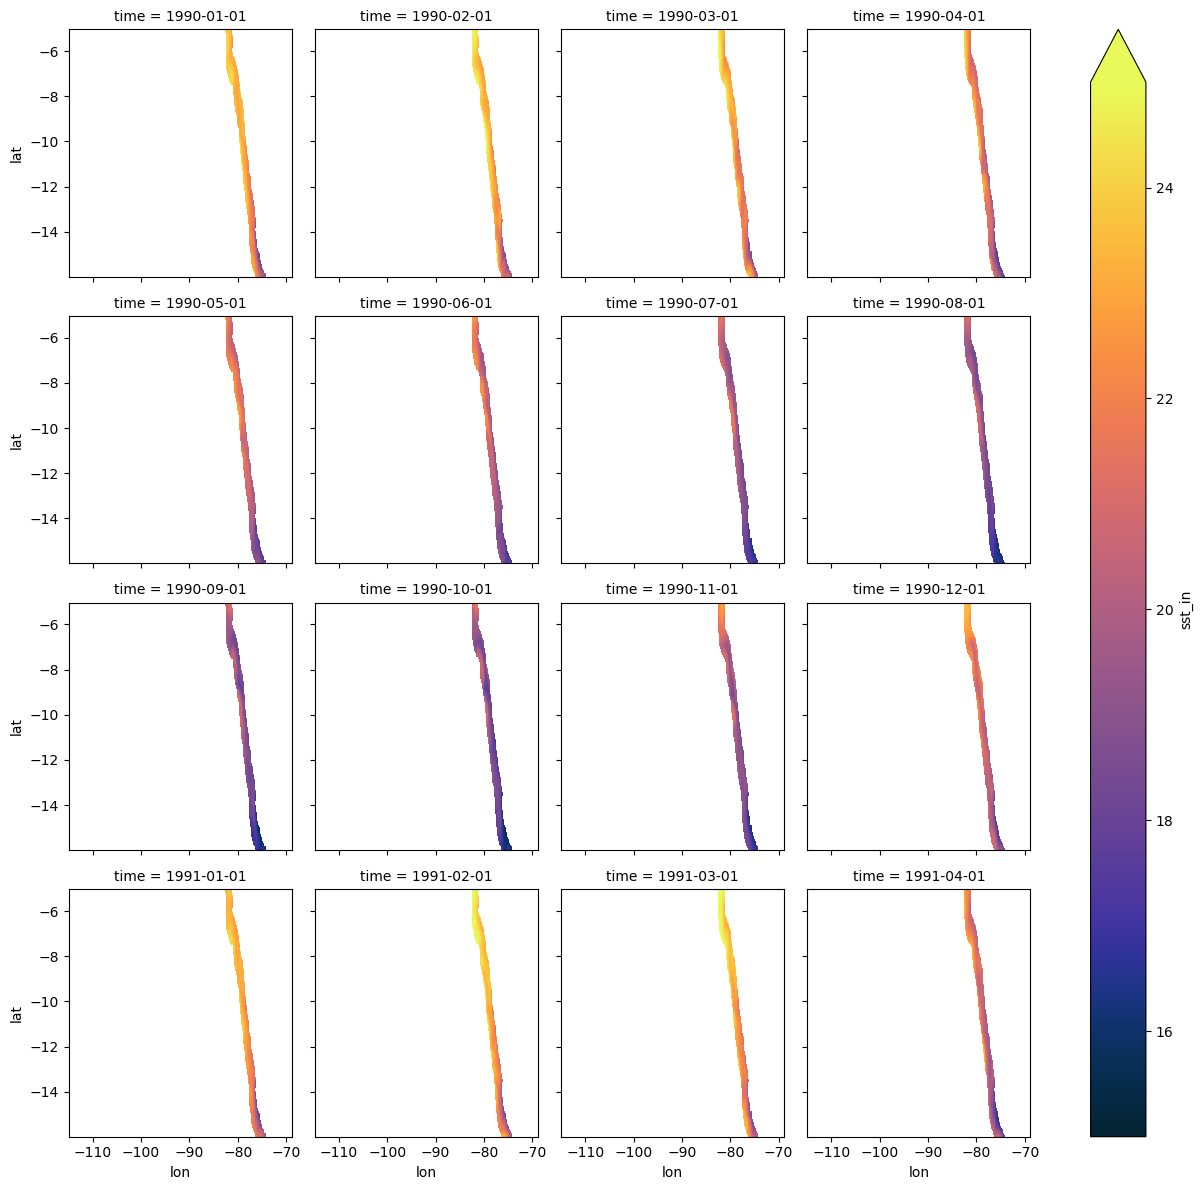

In [62]:
SST_in['sst_in'] = SST_in['sst_in'].where(SST_in['sst_in'] != 0, drop=False)

SST_in.sst_in.isel(time=slice(None,16)).plot(x="lon", y="lat", cmap=cm.thermal,
                                              col = 'time', col_wrap=4,
                                         vmin=15, vmax=25)

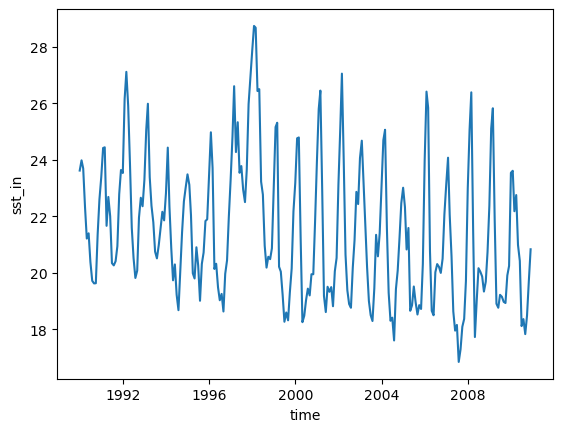

In [63]:
#SST_in.where(SST_in.lat >= -7, drop=True).nanmean()
reduced_mean=SST_in['sst_in'].where(SST_in.lat >= -7, drop=True).mean(dim=("lat", 
                                                              "lon"),skipna=True)
reduced_mean.plot()

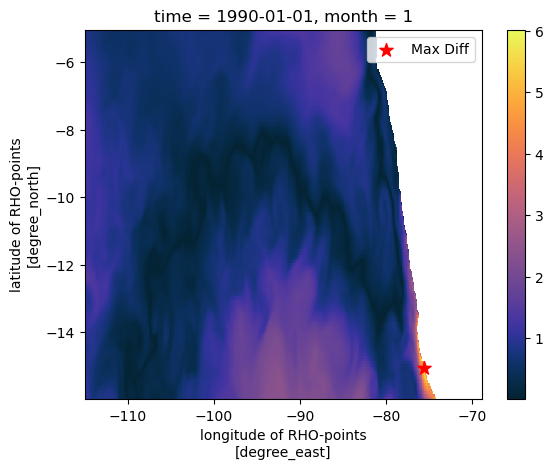

In [64]:
# abs_diff = SST.sst - reduced_mean
# abs_diff.values
#reduced_mean[0]
SST['sst'] = SST['sst'].where(SST['sst'] != 0, drop=False)

abs_diff=abs(SST.sst.isel(time=0) - reduced_mean[0])

#maximum value
max_value = abs_diff.max().values
max_location = abs_diff.where(abs_diff.compute() == max_value, drop=True)

# Get the latitude and longitude of the maximum difference
max_lat = max_location["lat_rho"].values.item()
max_lon = max_location["lon_rho"].values.item()


abs_diff.plot(x="lon_rho", y="lat_rho",cmap=cm.thermal)
# Add a star at the maximum location
plt.scatter(max_lon, max_lat, color="red", marker="*", s=100, label="Max Diff")
plt.legend()
plt.show()
#print(max(abs_diff))

#### redifine the DATASET of SST

In [65]:
# SST_in = xr.Dataset(
#     data_vars={
#         'sst_in':(('time','lat','lon'),SST_inshore.values),
#     },
#     coords = {
#         'lat': (('lat','lon'),SST_inshore.lat.values),
#         'lon': (('lat','lon'),SST_inshore.lon.values),
#         'time': SST_inshore.time.values,
#     }
# )
# SST_in

SST_out = xr.Dataset(
    data_vars={
        'sst_out':(('time','lat','lon'),SST['sst'].values),
        'sst_out_anom':(('time','lat','lon'),SST['ssta'].values),
    },
    coords = {
        'lat': (('lat','lon'),SST.lat_rho.values),
        'lon': (('lat','lon'),SST.lon_rho.values),
        'time':SST.time.values
    }
)
SST_out

<xarray.Dataset> Size: 150MB
Dimensions:       (time: 252, lat: 134, lon: 554)
Coordinates:
    lat           (lat, lon) float32 297kB -15.95 -15.95 ... -5.076 -5.076
    lon           (lat, lon) float32 297kB -114.9 -114.9 ... -68.95 -68.87
  * time          (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
Data variables:
    sst_out       (time, lat, lon) float32 75MB 24.58 24.62 24.64 ... nan nan
    sst_out_anom  (time, lat, lon) float32 75MB -0.5583 -0.5114 ... 0.0 0.0

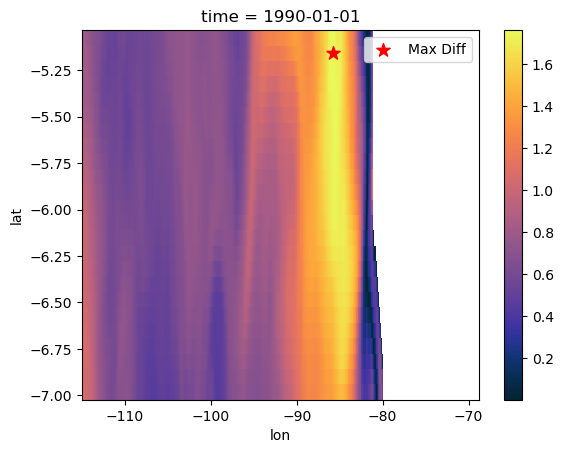

In [66]:
abs_diff=abs(SST_out.sst_out.where(SST_out['lat'] > -7, drop=True).isel(time=0)
             - reduced_mean[0])

#SST_out.sst_out.where(SST_out['lat'] > -7, drop=True).isel(time=0).plot(x="lon", y="lat", cmap="viridis")
#SST_out.sst_out.isel(lat=-7,time=0).plot()

#maximum value
max_value = abs_diff.max().values
max_location = abs_diff.where(abs_diff.compute() == max_value, drop=True)

# Get the latitude and longitude of the maximum difference
max_lat = max_location["lat"].values.item()
max_lon = max_location["lon"].values.item()


abs_diff.plot(x="lon", y="lat",cmap=cm.thermal)
# Add a star at the maximum location
plt.scatter(max_lon, max_lat, color="red", marker="*", s=100, label="Max Diff")
plt.legend()
plt.show()

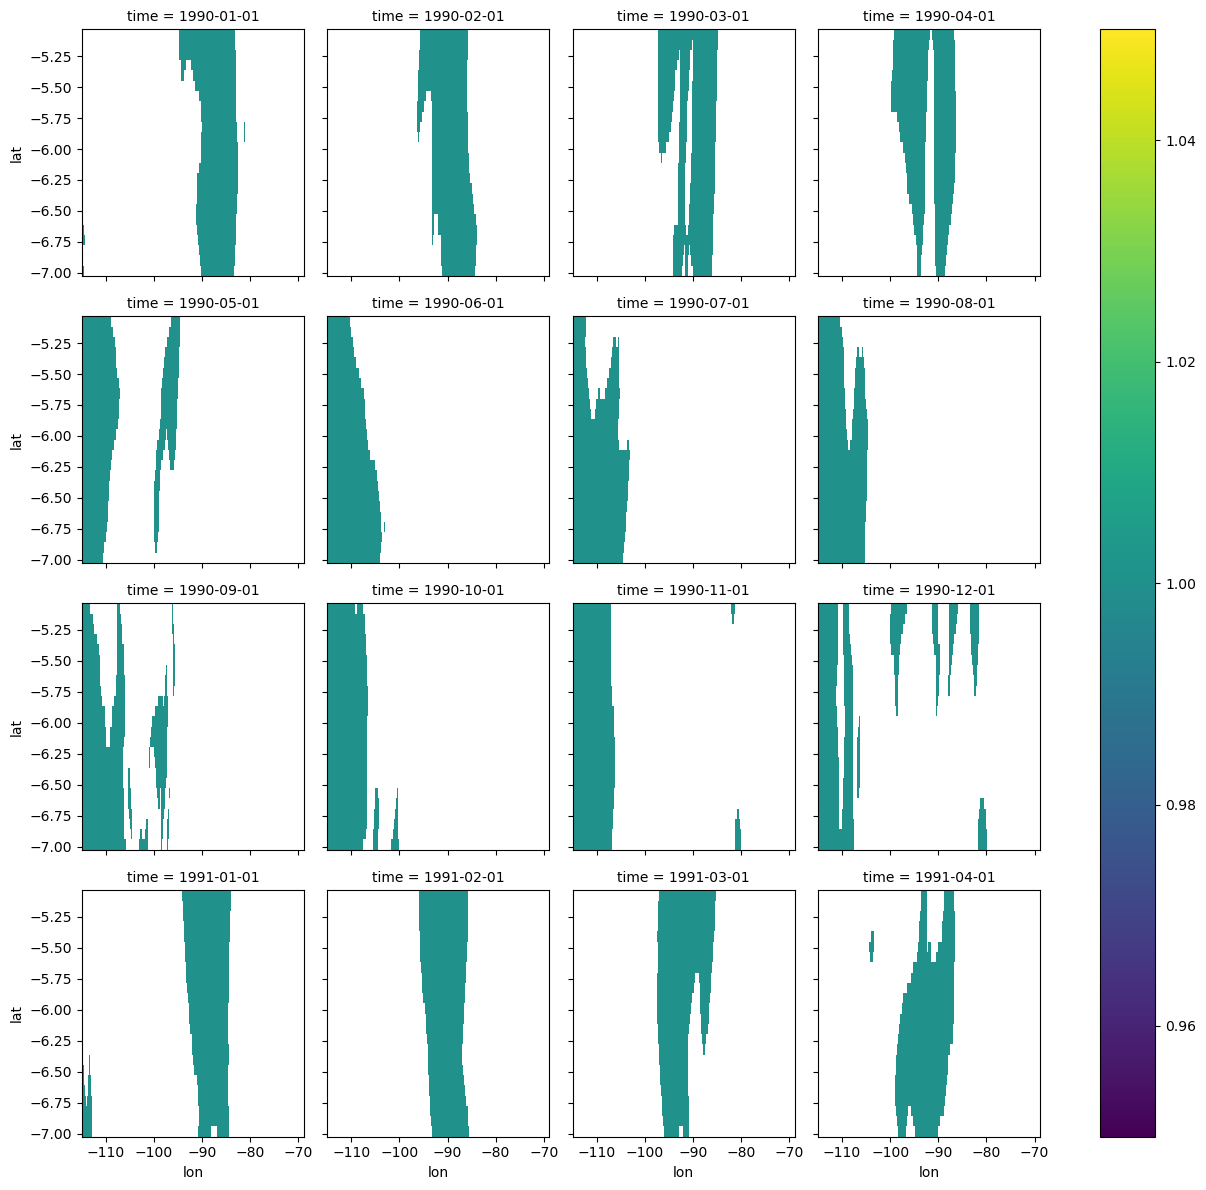

In [67]:
# Step 1: Compute the 75th percentile (upper quartile)
SST_lats = SST_out.sst_out.where(SST_out['lat'] > -7, drop=True)

abs_diff=abs(SST_lats
             - reduced_mean)

upper_quartile = abs_diff.quantile(0.75, dim=("lat", "lon"), skipna=True)

# # Step 2: Identify values in `abs_diff` greater than or equal to the upper quartile
upper_quartile_mask = abs_diff >= upper_quartile

upper_quartile_mask = upper_quartile_mask.where(upper_quartile_mask != 0, drop=False)

upper_quartile_mask.isel(time=slice(None,16)).plot(col='time',col_wrap=4)


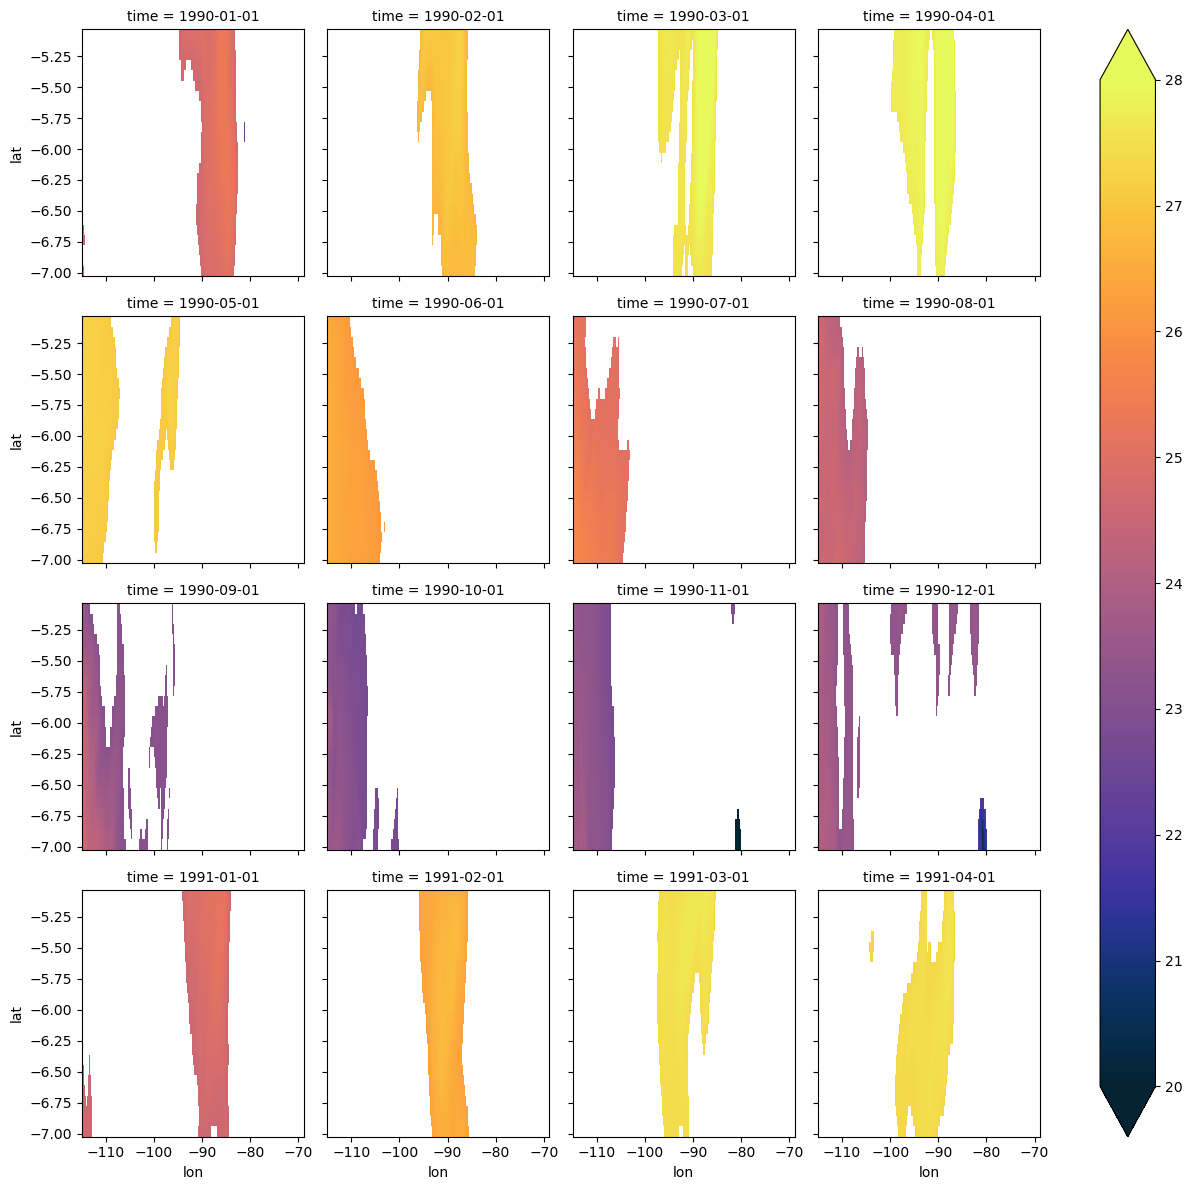

In [68]:

SST_off = upper_quartile_mask * SST_lats
SST_off.isel(time=slice(None,16)).plot(col='time',col_wrap=4, cmap=cm.thermal,
                                      vmin=20,vmax=28)

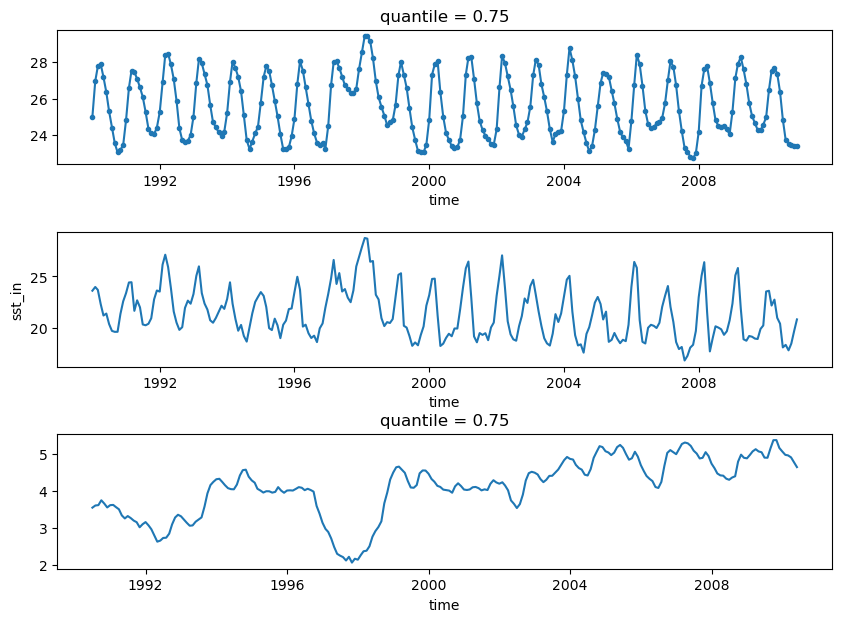

In [69]:
CUI_max = abs(SST_off.mean(dim=('lat','lon')) - reduced_mean)
## 
fig,axs = plt.subplots(3,1, figsize=(10,7))
fig.subplots_adjust(hspace=.5, wspace=.3)
axs=axs.ravel()

SST_off.mean(dim=('lat','lon')).plot(ax=axs[0],marker='.')
reduced_mean.plot(ax=axs[1])
CUI_max.rolling(time=13,center=True).mean().plot(ax=axs[2])
#axs[2].subset_title('CUI_max RM')

<xarray.DataArray (time: 252, lat: 24)> Size: 48kB
array([[1.20226494, 1.24754613, 1.28944565, ..., 1.25824516, 1.28719644,
        1.33840648],
       [3.06530547, 3.13926656, 3.21304237, ..., 2.37555656, 2.31275098,
        2.24423324],
       [4.19411662, 4.21513962, 4.21420942, ..., 3.86088142, 3.78031942,
        3.75183234],
       ...,
       [6.21887034, 6.19052409, 6.08366371, ..., 3.70027683, 3.64368133,
        3.55435361],
       [4.58040172, 4.44503563, 4.30427937, ..., 3.11168046, 3.06729615,
        2.95693632],
       [3.21984439, 3.23670492, 3.21709202, ..., 1.85207346, 1.79065388,
        1.72751091]])
Coordinates:
  * time      (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    quantile  float64 8B 0.75
Dimensions without coordinates: lat

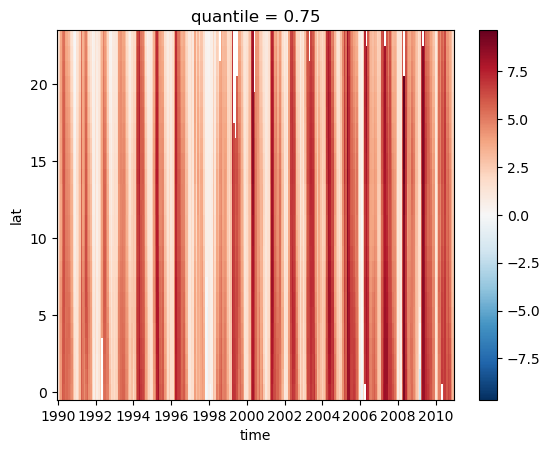

In [74]:
reduced_lat=SST_in['sst_in'].where(SST_in.lat >= -7, drop=True).mean(dim=("lon")
                                                                     ,skipna=True)
#reduced_lat.plot(x='time')

CUI_lat = SST_off.mean(dim=('lon')) - reduced_lat
CUI_lat.plot(x='time',y='lat')
CUI_lat

### We are almost there
#### 1) Figure out how to do the CUI latitudinal
#### 2) Loop over the CUI max per latitude , also convert everything to a function to make it easier

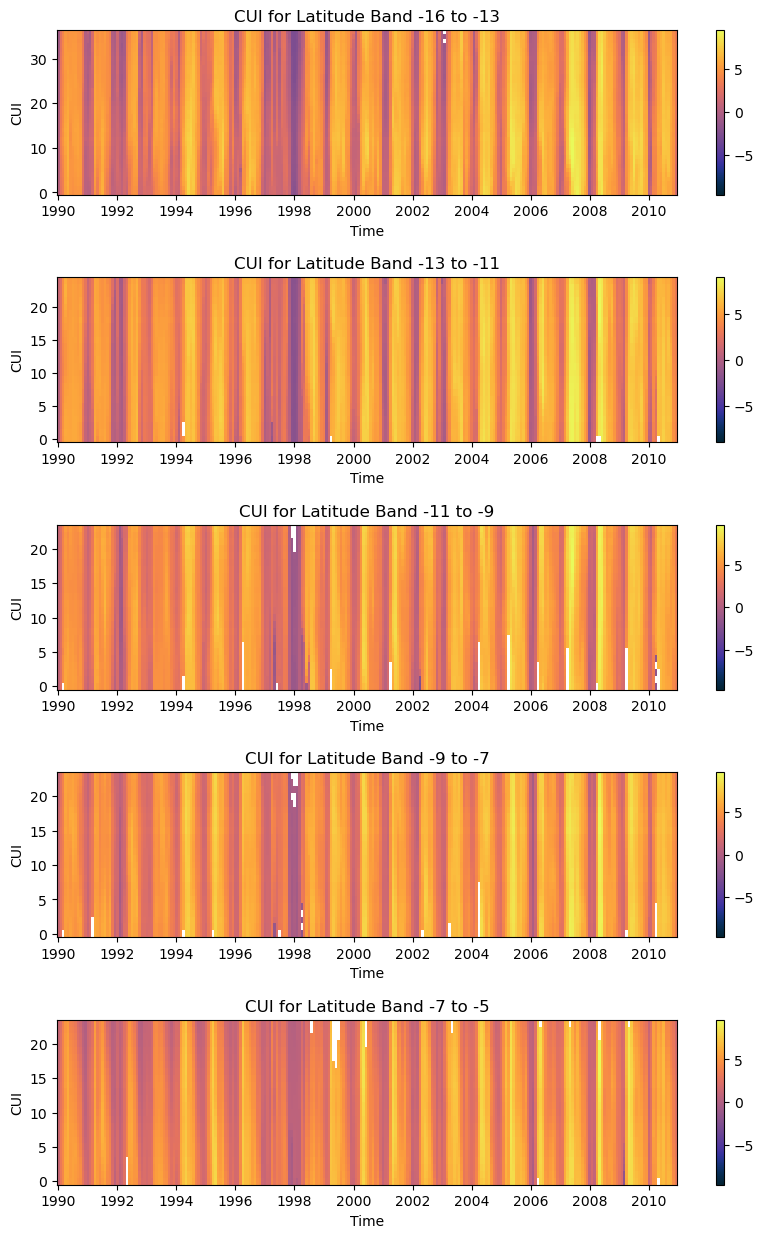

<xarray.DataArray (time: 252, lat: 37)> Size: 75kB
array([[ 0.56513738,  0.55738836,  0.50597522, ..., -0.53028683,
        -0.66620892, -0.59837672],
       [ 2.68826081,  2.84818448,  2.97188417, ...,  2.66489465,
         2.72541026,  2.65186583],
       [ 3.48557522,  3.56443819,  3.5639834 , ...,  4.02351563,
         4.04907715,  3.97568252],
       ...,
       [ 5.96614228,  5.64126044,  5.56568236, ...,  5.77342632,
         5.81634477,  5.74261577],
       [ 4.43556181,  4.50423509,  4.62505909, ...,  4.4759861 ,
         4.4325475 ,  4.36501664],
       [ 1.8275684 ,  1.90958374,  1.90097744, ...,  3.49701668,
         3.5235751 ,  3.42150282]])
Coordinates:
  * time      (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    quantile  float64 8B 0.75
Dimensions without coordinates: lat

In [80]:
import matplotlib.pyplot as plt
#from matplotlib import cm

# Latitude bands in the Southern Hemisphere
latitude_bands = [(-16, -13), (-13, -11), (-11, -9), (-9, -7), (-7,-5)]

# Initialize figure
fig, axs = plt.subplots(len(latitude_bands), 1, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)

# Dictionary to store results
CUI_results = {}

# Loop through latitude bands
for i, (lat_min, lat_max) in enumerate(latitude_bands):
    # Step 1: Subset the data for the latitude band
    SST_lats_band = SST_out.sst_out.where(
        (SST_out['lat'] >= lat_min) & (SST_out['lat'] < lat_max), drop=True
    )
    
    # Step 2: Compute absolute difference from reduced_mean
    abs_diff_band = abs(SST_lats_band - reduced_mean)
    
    # Step 3: Compute the 75th percentile (upper quartile)
    upper_quartile_band = abs_diff_band.quantile(0.75, dim=("lat", "lon"), skipna=True)
    
    # Step 4: Create the mask for values >= upper quartile
    upper_quartile_mask_band = abs_diff_band >= upper_quartile_band
    upper_quartile_mask_band = upper_quartile_mask_band.where(upper_quartile_mask_band != 0, drop=False)
    
    # Step 5: Apply the mask to SST_lats
    SST_off_band = upper_quartile_mask_band * SST_lats_band
    
    # Step 6: Compute reduced latitude mean for the latitude band
    reduced_lat_band = SST_in['sst_in'].where(
        (SST_in.lat >= lat_min) & (SST_in.lat < lat_max), drop=True
    ).mean(dim=("lon"), skipna=True)
    
    # Step 7: Calculate CUI_lat for the band
    CUI_lat_band = SST_off_band.mean(dim="lon") - reduced_lat_band
    CUI_results[(lat_min, lat_max)] = CUI_lat_band

    # Step 8: Plot
    CUI_lat_band.plot(ax=axs[i], x="time", y="lat", cmap=cm.thermal)
    axs[i].set_title(f"CUI for Latitude Band {lat_min} to {lat_max}")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("CUI")

# Show the figure
plt.show()

# Display one of the CUI_lat results as an example
CUI_results[(-16, -13)]


In [173]:
# CUI_16_13=CUI_results[(-16,-13)].mean(dim='lat',skipna=True).rolling(time=13,center=True).mean()
# CUI_13_11=CUI_results[(-13,-11)].mean(dim='lat',skipna=True).rolling(time=13,center=True).mean()
# CUI_11_9=CUI_results[(-11,-9)].mean(dim='lat',skipna=True).rolling(time=13,center=True).mean()
# CUI_9_7=CUI_results[(-9,-7)].mean(dim='lat',skipna=True).rolling(time=13,center=True).mean()
# CUI_7_5=CUI_results[(-7,-5)].mean(dim='lat',skipna=True).rolling(time=13,center=True).mean()

# fig,axs = plt.subplots(5,1, figsize=(10,20))
# fig.subplots_adjust(hspace=.5, wspace=.3)
# axs=axs.ravel()

# CUI_7_5.plot(ax=axs[0])
# CUI_results[(-7,-5)].mean(dim='lat',skipna=True).plot(ax=axs[0])
# axs[0].set_title(f"Rolling Mean 5S to 7S")
# axs[0].grid()

# CUI_9_7.plot(ax=axs[1])
# axs[1].set_title(f"Rolling Mean 7S to 9S")
# axs[1].grid()

# CUI_11_9.plot(ax=axs[2])
# axs[2].set_title(f"Rolling Mean 9S to 11S")
# axs[2].grid()

# CUI_13_11.plot(ax=axs[3])
# axs[3].set_title(f"Rolling Mean 11S to 13S")
# axs[3].grid()

# CUI_16_13.plot(ax=axs[4])
# axs[4].set_title(f"Rolling Mean 13S to 16S")
# axs[4].grid()
# #CUI_results[(-16,-13)].mean(dim='lat',skipna=True).rolling(time=13,center=True).mean().plot()

# # plt.savefig('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/CUI_cal_latitude.png',format='png', 
# #             dpi=300, transparent=True,bbox_inches='tight')



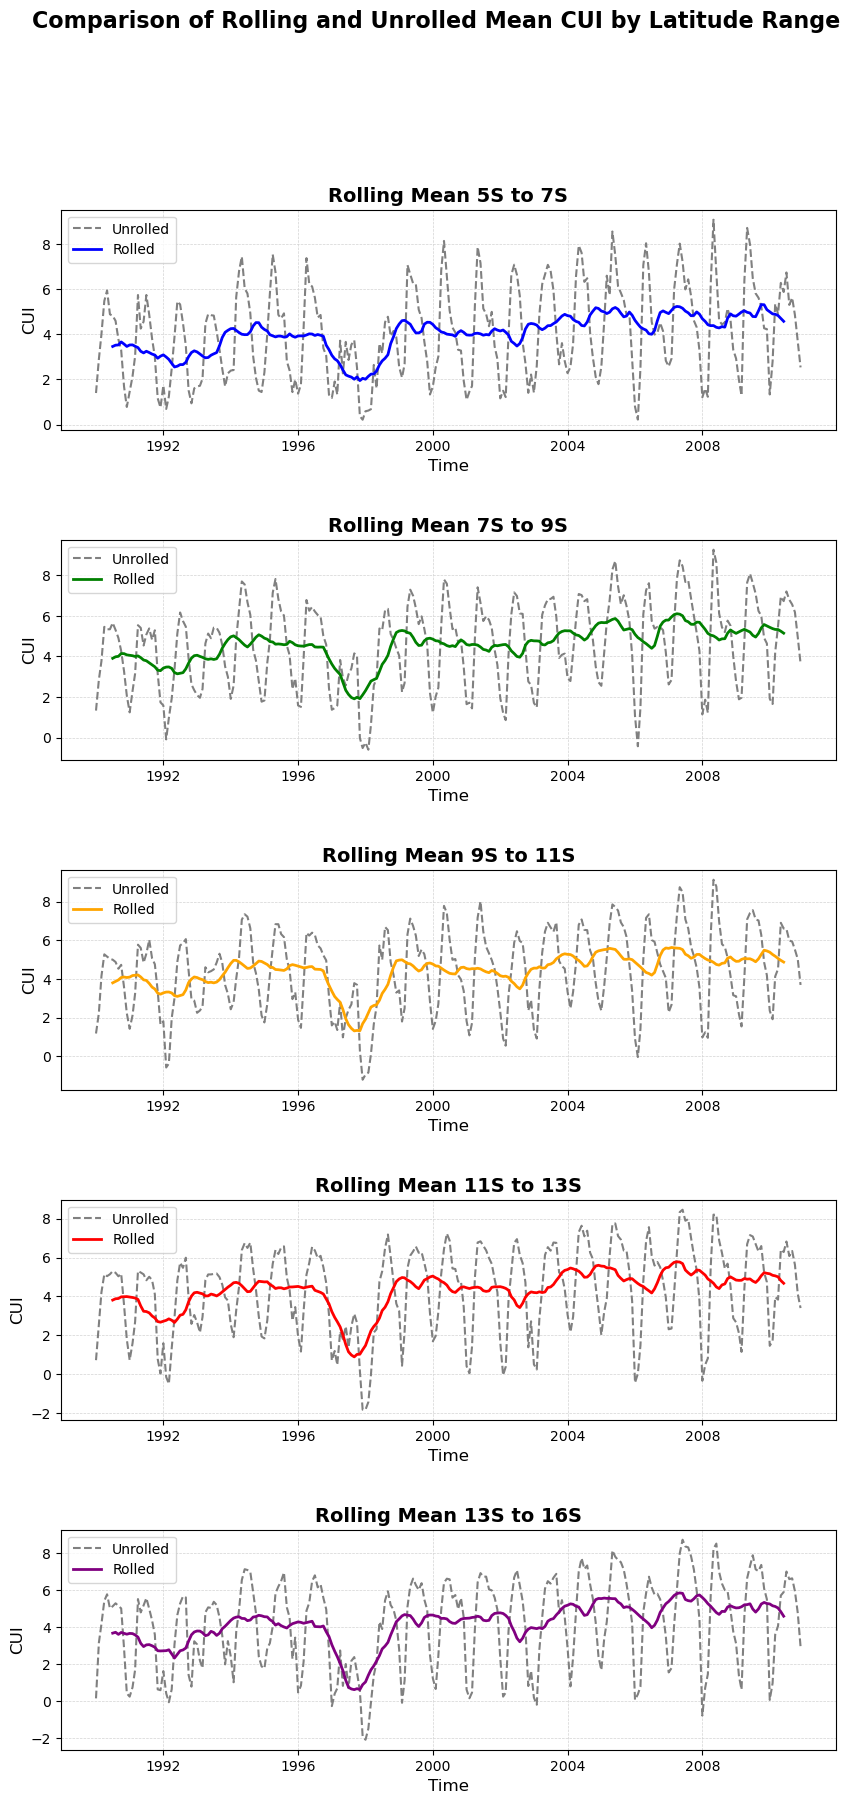

In [172]:
#import matplotlib.pyplot as plt

# Create the figure and axes
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()

# Define a helper function to plot both rolled and unrolled values
def plot_rolled_and_unrolled(ax, rolled, unrolled, title, color="blue"):
    unrolled.plot(ax=ax, color="grey", linestyle="--", label="Unrolled")
    rolled.plot(ax=ax, color=color, linewidth=2, label="Rolled")
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.legend(fontsize=10)
    ax.grid(color="lightgrey", linestyle="--", linewidth=0.5)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("CUI", fontsize=12)

# Plot each latitude range
plot_rolled_and_unrolled(
    axs[0],
    CUI_7_5,
    CUI_results[(-7, -5)].mean(dim="lat", skipna=True),
    "Rolling Mean 5S to 7S",
    color="blue",
)

plot_rolled_and_unrolled(
    axs[1],
    CUI_9_7,
    CUI_results[(-9, -7)].mean(dim="lat", skipna=True),
    "Rolling Mean 7S to 9S",
    color="green",
)

plot_rolled_and_unrolled(
    axs[2],
    CUI_11_9,
    CUI_results[(-11, -9)].mean(dim="lat", skipna=True),
    "Rolling Mean 9S to 11S",
    color="orange",
)

plot_rolled_and_unrolled(
    axs[3],
    CUI_13_11,
    CUI_results[(-13, -11)].mean(dim="lat", skipna=True),
    "Rolling Mean 11S to 13S",
    color="red",
)

plot_rolled_and_unrolled(
    axs[4],
    CUI_16_13,
    CUI_results[(-16, -13)].mean(dim="lat", skipna=True),
    "Rolling Mean 13S to 16S",
    color="purple",
)

# Add a shared title for the entire figure
fig.suptitle("Comparison of Rolling and Unrolled Mean CUI by Latitude Range", fontsize=16, fontweight="bold")

# plt.savefig('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/CUI_cal_latitude.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')

# Display the plot
plt.show()


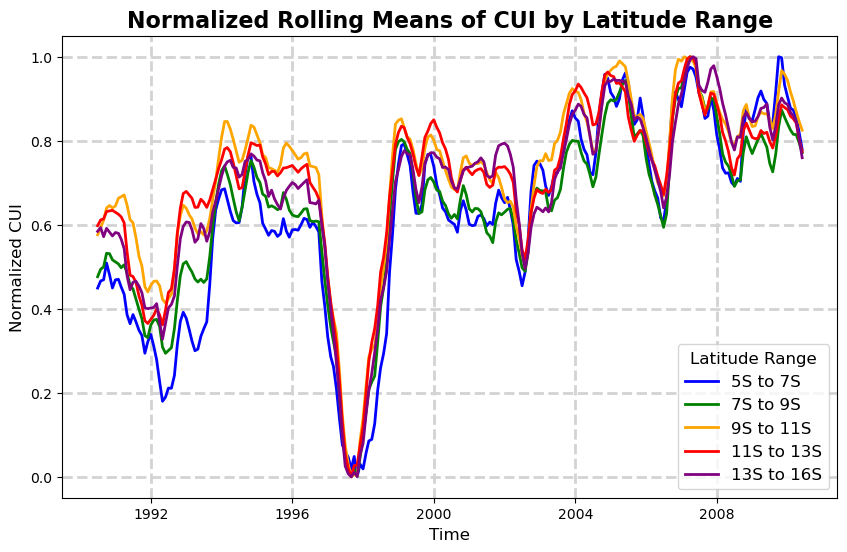

In [178]:
# #CUI_lat_band.data.mean('lat',skipna=True)
# fig,axs = plt.subplots(2,1, figsize=(10,7))
# fig.subplots_adjust(hspace=.5, wspace=.3)
# axs=axs.ravel()

# CUI_max.rolling(time=13,center=True).mean().plot(ax=axs[0])
# axs[0].grid()
# CUI_lat_band.mean(dim='lat',skipna=True).rolling(time=13,center=True).mean().plot(ax=axs[1])
# axs[1].grid()

# Normalize the data



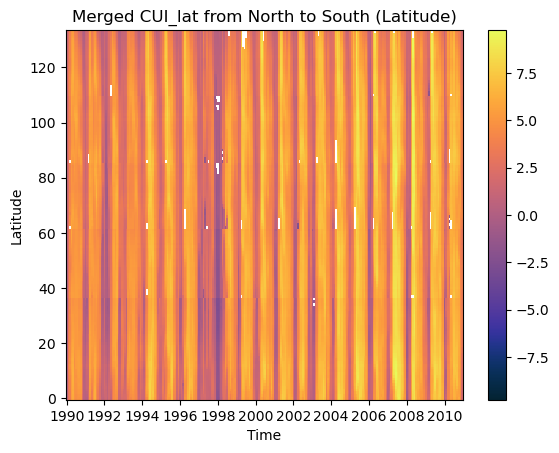

<xarray.DataArray (time: 252, lat: 134)> Size: 270kB
array([[0.56513738, 0.55738836, 0.50597522, ..., 1.25824516, 1.28719644,
        1.33840648],
       [2.68826081, 2.84818448, 2.97188417, ..., 2.37555656, 2.31275098,
        2.24423324],
       [3.48557522, 3.56443819, 3.5639834 , ..., 3.86088142, 3.78031942,
        3.75183234],
       ...,
       [5.96614228, 5.64126044, 5.56568236, ..., 3.70027683, 3.64368133,
        3.55435361],
       [4.43556181, 4.50423509, 4.62505909, ..., 3.11168046, 3.06729615,
        2.95693632],
       [1.8275684 , 1.90958374, 1.90097744, ..., 1.85207346, 1.79065388,
        1.72751091]])
Coordinates:
  * time      (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    quantile  float64 8B 0.75
Dimensions without coordinates: lat

In [103]:
## merge the results of CUI by latitude 

# List to store the CUI_lat DataArrays for each latitude band
CUI_lat_bands = []

# Merge all latitude bands from north (-7) to south (-16)
for lat_min, lat_max in latitude_bands:
    CUI_lat_band = CUI_results[(lat_min, lat_max)]
    CUI_lat_bands.append(CUI_lat_band)

# Concatenate all the latitude bands along the latitude dimension
CUI_merged = xr.concat(CUI_lat_bands, dim="lat")

# Sort by latitude to ensure correct ordering from north (-7) to south (-16)
CUI_merged = CUI_merged.sortby("lat")

# Plot the merged result
CUI_merged.plot(x="time", y="lat", cmap=cm.thermal)
plt.title("Merged CUI_lat from North to South (Latitude)")
plt.xlabel("Time")
plt.ylabel("Latitude")
plt.show()

# Display the merged dataset
CUI_merged


In [121]:
# SST_in = xr.Dataset(
#     data_vars={
#         'sst_in':(('time','lat','lon'),SST_inshore.values),
#     },
#     coords = {
#         'lat': (('lat','lon'),SST_inshore.lat.values),
#         'lon': (('lat','lon'),SST_inshore.lon.values),
#         'time': SST_inshore.time.values,
#     }
# )
CUI_maxi = xr.Dataset(
    data_vars={
        'CUI_max':CUI_merged,
    },
    coords ={
        'lat':(('lat'), SST_in.lat[:, 0].data),
        'time':CUI_merged.time,
    }
)
CUI_maxi


<xarray.Dataset> Size: 273kB
Dimensions:   (time: 252, lat: 134)
Coordinates:
  * time      (time) datetime64[ns] 2kB 1990-01-01 1990-02-01 ... 2010-12-01
    quantile  float64 8B 0.75
  * lat       (lat) float32 536B -15.95 -15.87 -15.79 ... -5.242 -5.159 -5.076
Data variables:
    CUI_max   (time, lat) float64 270kB 0.5651 0.5574 0.506 ... 1.791 1.728

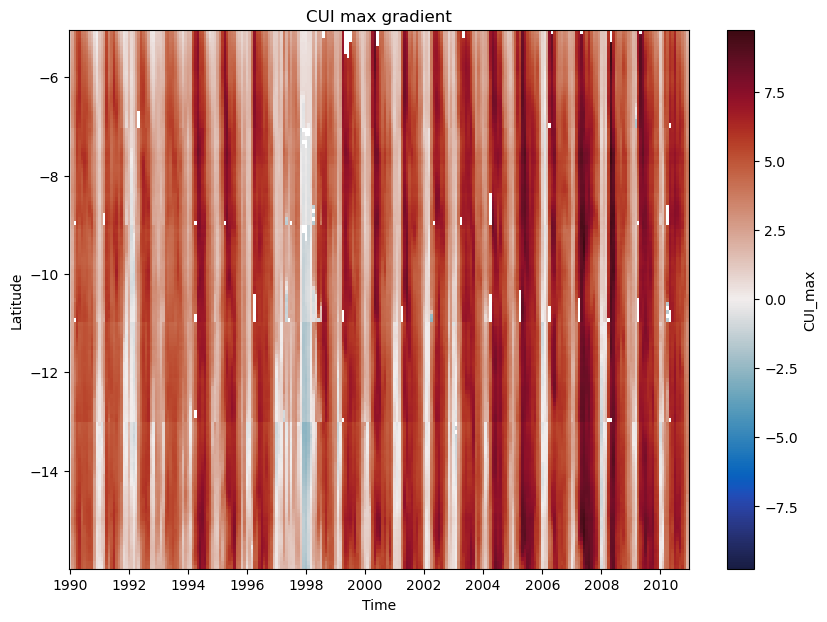

In [149]:
fig,axs = plt.subplots(1,1, figsize=(10,7))

CUI_maxi.CUI_max.plot(x="time", y="lat", cmap=cm.balance)
plt.title("CUI max gradient")
plt.xlabel("Time")
plt.ylabel("Latitude")


# plt.savefig('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/CUI_MAX.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')
# plt.show()

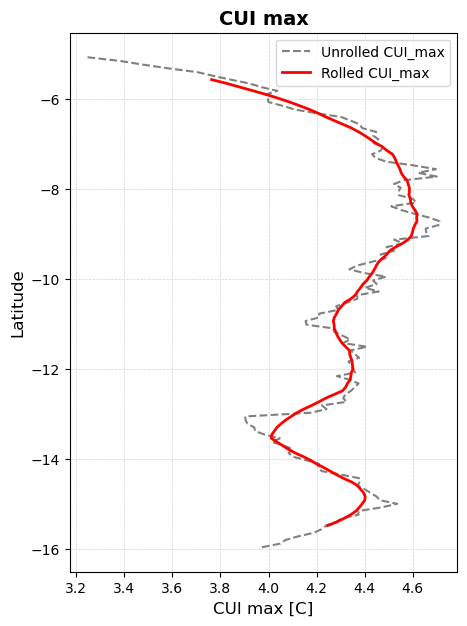

In [168]:
# fig,axs = plt.subplots(1,1, figsize=(5,7))
# CUI_maxi.CUI_max.mean(dim='time').plot(y='lat')
# plt.grid()

# CUI_maxi.CUI_max.mean(dim='time').rolling(lat=13,center=True).mean().plot(y='lat')
# plt.title("CUI max")

# Create the figure and axis
fig, axs = plt.subplots(1, 1, figsize=(5, 7))

# Plot the original (unrolled) CUI_max in grey
CUI_maxi.CUI_max.mean(dim='time').plot(
    y='lat', 
    ax=axs, 
    color='grey', 
    linestyle='--', 
    label='Unrolled CUI_max'
)

# Plot the rolled CUI_max in thicker red
CUI_maxi.CUI_max.mean(dim='time').rolling(lat=13, center=True).mean().plot(
    y='lat', 
    ax=axs, 
    color='red', 
    linewidth=2, 
    label='Rolled CUI_max'
)

# Add grid, title, and legend
axs.grid(color='lightgrey', linestyle='--', linewidth=0.5)
axs.set_title("CUI max", fontsize=14, fontweight='bold')
axs.legend(fontsize=10)
axs.set_xlabel("CUI max [C]", fontsize=12)
axs.set_ylabel("Latitude", fontsize=12)

# plt.savefig('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/CUI_MAX_lat.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')
plt.show()
# Display the plot
plt.show()


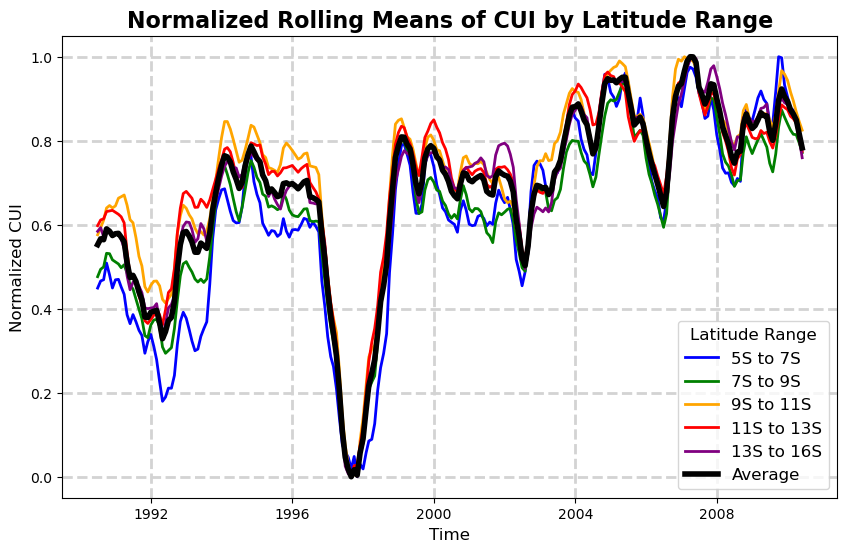

In [184]:
CUI_MAX=CUI_maxi.CUI_max.mean(dim='lat').rolling(time=13, center=True).mean()

def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

# Normalize each rolled mean
CUI_7_5_norm = normalize(CUI_7_5)
CUI_9_7_norm = normalize(CUI_9_7)
CUI_11_9_norm = normalize(CUI_11_9)
CUI_13_11_norm = normalize(CUI_13_11)
CUI_16_13_norm = normalize(CUI_16_13)
CUI_MAX_norm = normalize(CUI_MAX)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each normalized rolled mean
CUI_7_5_norm.plot(ax=ax, label="5S to 7S", color="blue", linewidth=2)
CUI_9_7_norm.plot(ax=ax, label="7S to 9S", color="green", linewidth=2)
CUI_11_9_norm.plot(ax=ax, label="9S to 11S", color="orange", linewidth=2)
CUI_13_11_norm.plot(ax=ax, label="11S to 13S", color="red", linewidth=2)
CUI_16_13_norm.plot(ax=ax, label="13S to 16S", color="purple", linewidth=2)
CUI_MAX_norm.plot(ax=ax, label="Average", color="black", linewidth=4)

# Add legend, grid, and labels
ax.legend(fontsize=12, loc="lower right", title="Latitude Range", title_fontsize=12)
ax.set_title("Normalized Rolling Means of CUI by Latitude Range", fontsize=16, fontweight="bold")
ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Normalized CUI", fontsize=12)
ax.grid(color="lightgrey", linestyle="--", linewidth=2)

# plt.savefig('../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/CUI_lat_normal.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')

# Display the plot
plt.show()

### CUI comparison

In [189]:

# Load MATLAB file
CUI_old = loadmat("../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/indices/CUI_SST_index.mat")

# Check keys in the MATLAB file
print(CUI_old.keys())

dict_keys(['__header__', '__version__', '__globals__', 'CUI_SSTi', 'Mean_CUI', 'SST_inshore_lat', 'SST_offshore_lat', 'lati', 'time'])


In [207]:
CUI_old['CUI_SSTi'].shape
#mean_cui = np.array(CUI_old['Mean_CUI']).squeeze()  # Convert to a 1D numpy array
# ro
# plt.figure(figsize=(10, 6))
# plt.plot(CUI_MAX.time, mean_cui, label="Mean CUI", color="blue", linewidth=2)  # Adjust as needed
# plt.title("Mean CUI Over Time", fontsize=16, fontweight="bold")
# plt.xlabel("Time", fontsize=14)
# plt.ylabel("Mean CUI", fontsize=14)
# plt.grid(color="lightgrey", linestyle="--", linewidth=0.5)
# plt.legend(fontsize=12)
# plt.tight_layout()
# plt.show()
         

(185, 252)

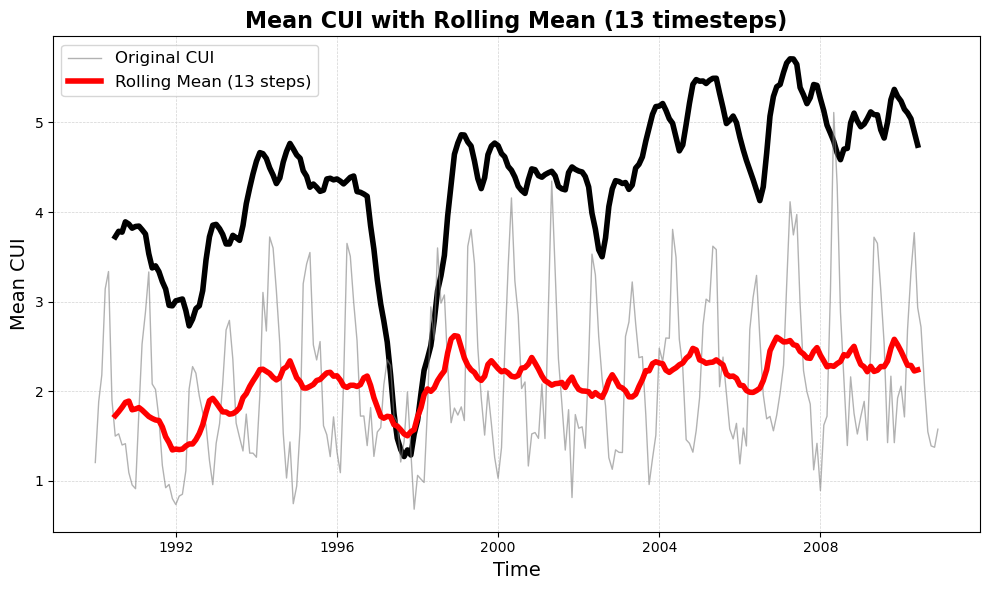

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract Mean_CUI and time from the MATLAB file
mean_cui = np.array(CUI_old['Mean_CUI']).squeeze()
time = np.array(CUI_old['time']).squeeze()

# Create a pandas DataFrame for easier rolling operation
df = pd.DataFrame({'Time': time, 'Mean_CUI': mean_cui})

# Perform rolling mean with a window of 13 timesteps, center-aligned
df['Rolling_Mean_CUI'] = df['Mean_CUI'].rolling(window=13, center=True).mean()

#df['Normalized_CUI'] = normalize(df['Rolling_Mean_CUI'])

# Plot the original and rolling mean CUI
plt.figure(figsize=(10, 6))
CUI_MAX.plot(color="black", linewidth=4)
plt.plot(CUI_MAX.time, df['Mean_CUI'], label="Original CUI", color="grey", linewidth=1, alpha=0.6)
plt.plot(CUI_MAX.time, df['Rolling_Mean_CUI'], label="Rolling Mean (13 steps)", color="red", linewidth=4)
plt.title("Mean CUI with Rolling Mean (13 timesteps)", fontsize=16, fontweight="bold")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Mean CUI", fontsize=14)
plt.grid(color="lightgrey", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


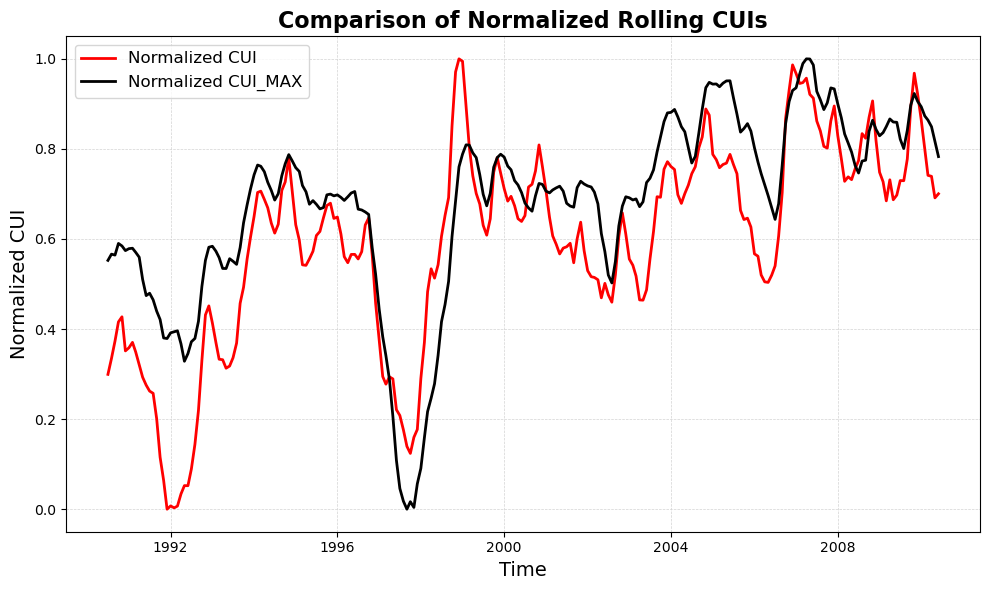

In [215]:
# Normalize the rolled Mean_CUI from MATLAB
normalized_rolling_cui_old = (df['Rolling_Mean_CUI'] - df['Rolling_Mean_CUI'].min()) / (df['Rolling_Mean_CUI'].max() - df['Rolling_Mean_CUI'].min())

# Plot the normalized MATLAB Mean_CUI
plt.figure(figsize=(10, 6))

plt.plot(CUI_MAX.time, normalized_rolling_cui_old, label="Normalized CUI ", color="red", linewidth=2)

# Plot the normalized Python CUI_MAX
plt.plot(CUI_MAX.time, CUI_MAX_norm, label="Normalized CUI_MAX", color="black", linewidth=2)

# Formatting the plot
plt.title("Comparison of Normalized Rolling CUIs", fontsize=16, fontweight="bold")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Normalized CUI", fontsize=14)
plt.grid(color="lightgrey", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [234]:
#SST_inshore = SST['sst'] * inshore_mask
#Ek_mask=Ekman_ds.ekman_pump * inshore_mask

print(inshore_mask.shape)
print(Ekman_ds['Ekman_pump'].shape)

#Ekman_ds['Ekman_pump'] * inshore_mask
#Ekman_ds['Ekman_pump'] * inshore_mask
# Pump_in = xr.Dataset(
#     data_vars={
#         'sst_in':(('time','lat','lon'),SST_inshore.values),
#     },
#     coords = {
#         'lat': (('lat','lon'),SST_inshore.lat.values),
#         'lon': (('lat','lon'),SST_inshore.lon.values),
#         'time': SST_inshore.time.values,
#     }
# )

(134, 554)
(134, 554, 252)


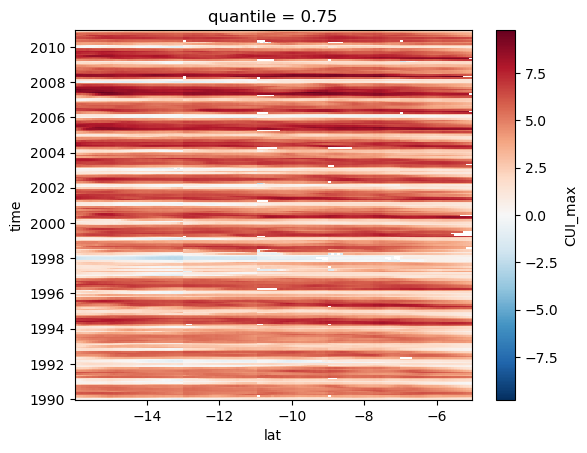

In [243]:
#CUI_maxi.CUI_max.plot()
CUI_maxi.to_netcdf("../../NHCS/hindcast/CROCO_BioEBUS_1990-2010/indices/CUI_maxi_dataset.nc")
